In [50]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn import linear_model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import VAR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ParameterGrid
import numpy as np
import seaborn as sns
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman2
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
import itertools
import pmdarima as pm
from sklearn.pipeline import make_pipeline
from pmdarima.arima import auto_arima
from sklearn.kernel_ridge import KernelRidge		
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from pmdarima.model_selection import train_test_split
from evds import evdsAPI
import pandas as pd
import numpy as np
from arch import arch_model
warnings.filterwarnings("ignore")

In [51]:
evds=evdsAPI('dsIC3fiGlu')


In [52]:
import yfinance as yf 


In [53]:
usd=evds.get_data(["TP.DK.USD.S.YTL"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
usd.dropna(inplace=True)
usd.iloc[-1,1]=yf.download(tickers='USDTRY=X',interval='1m')["Adj Close"][-1]
usd

[*********************100%%**********************]  1 of 1 completed


,Tarih,TP_DK_USD_S_YTL
0,01-02-2006,1.3263
1,02-02-2006,1.3241
2,03-02-2006,1.3277
3,06-02-2006,1.3257
4,07-02-2006,1.3296
...,...,...
4709,20-02-2024,30.8595
4710,21-02-2024,30.8944
4711,22-02-2024,30.9652
4712,23-02-2024,31.0140


In [54]:
usd['Tarih'] = pd.to_datetime(usd['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
usd.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
usd = usd.resample('M').mean()

usd.iloc[-1,0]=30.7419
usd

,TP_DK_USD_S_YTL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-10-31,27.846114
2023-11-30,28.637082
2023-12-31,29.074857


In [55]:
enf=evds.get_data(["TP.FE.OKTG01"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"))
enf

,Tarih,TP_FE_OKTG01
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
211,2023-9,1691.04
212,2023-10,1749.11
213,2023-11,1806.50
214,2023-12,1859.38


In [56]:

enf=pd.DataFrame(enf)
enf.columns=["Tarih","TÜFE"]


In [57]:

inflation=enf
inflation

,Tarih,TÜFE
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
211,2023-9,1691.04
212,2023-10,1749.11
213,2023-11,1806.50
214,2023-12,1859.38


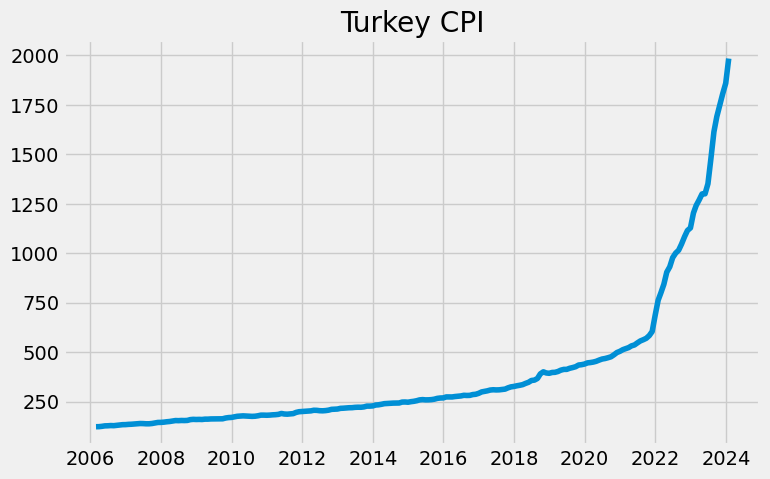

In [58]:
dates=pd.date_range(start="2006-02-28",periods=len(enf) , freq='1M')
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(dates)
plt.figure(figsize=(8,5))
plt.title("Turkey CPI")
plt.plot(df)
plt.show()


In [59]:
df6=pd.DataFrame()
df6["USD/TL"]=usd["TP_DK_USD_S_YTL"]

df6["USD/TL"]=df6["USD/TL"].astype(float)
df6

,USD/TL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-10-31,27.846114
2023-11-30,28.637082
2023-12-31,29.074857


In [60]:
money=evds.get_data(["TP.PR.ARZ13"],startdate="01-01-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
del money["YEARWEEK"]
money=pd.DataFrame(money)
money.columns=["Tarih","Para Arzi"]
money=money.set_index(pd.to_datetime(money["Tarih"], format='%d-%m-%Y'))
del money["Tarih"]
money=money.resample('M').last()
money=money.pct_change(1)*100
money=money.dropna()
money

,Para Arzi
Tarih,
2006-02-28,2.121748
2006-03-31,2.927613
2006-04-30,1.084694
2006-05-31,9.121170
2006-06-30,1.433197
...,...
2023-10-31,3.356297
2023-11-30,2.245991
2023-12-31,4.333376


In [61]:
m3=evds.get_data(["TP.PR.ARZ22"],startdate="28-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del m3["Tarih"]
m3.columns=["M3 Para Arzi"]
m3=m3/1e+08
m3=m3.set_index(money.index)
m3

,M3 Para Arzi
Tarih,
2006-02-28,2.663248
2006-03-31,2.731552
2006-04-30,2.767716
2006-05-31,3.025340
2006-06-30,3.038097
...,...
2023-10-31,130.934676
2023-11-30,134.161244
2023-12-31,140.183543


In [62]:

issizlik=evds.get_data(["TP.TIG08"],startdate="28-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del issizlik["Tarih"]
issizlik.columns=["İşsizlik"]
issizlik=issizlik.dropna(axis=0)
issizlik=issizlik.set_index(pd.date_range(start="2014-01-30",periods=len(issizlik),freq="1M"))
issizlik

,İşsizlik
2014-01-31,9.2
2014-02-28,9.5
2014-03-31,9.5
2014-04-30,9.7
2014-05-31,9.7
...,...
2023-08-31,9.1
2023-09-30,9.0
2023-10-31,8.5
2023-11-30,9.0


In [63]:
import yfinance as yf
df14=yf.download("BZ=F")["Close"]
df14=pd.DataFrame(df14)
df14.columns=["Brent"]
df14=df14.resample('M').mean()
df14

[*********************100%%**********************]  1 of 1 completed


,Brent
Date,
2007-07-31,76.395000
2007-08-31,71.258696
2007-09-30,77.135263
2007-10-31,82.456957
2007-11-30,92.060953
...,...
2023-10-31,88.704091
2023-11-30,82.027727
2023-12-31,77.324000


In [64]:
kredi=evds.get_data(["TP.KREDI.L001"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
del kredi["Tarih"]
del kredi["YEARWEEK"]
kredi=kredi.set_index(pd.date_range(start="2006-02-03",periods=len(kredi),freq="W"))
kredi.columns=["Kredi"]
kredi=(kredi.pct_change(4)*100).dropna()
kredi=kredi.resample('M').last()
kredi

,Kredi
2006-03-31,4.327119
2006-04-30,3.124932
2006-05-31,8.993162
2006-06-30,3.364474
2006-07-31,-0.493205
...,...
2023-10-31,2.154973
2023-11-30,2.932091
2023-12-31,2.873464
2024-01-31,1.789324


In [65]:
df3=pd.DataFrame()
df3["Kredi"]=kredi["Kredi"]
df3["TIME"]=pd.date_range(start="2006-03-28",periods=len(df3),freq="1M")
df3['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df3 = df3.set_index(['TIME'])
df3=df3.set_index(pd.date_range('2006-03-28',periods=len(df3) , freq='1M'))
df3

,Kredi
2006-03-31,4.327119
2006-04-30,3.124932
2006-05-31,8.993162
2006-06-30,3.364474
2006-07-31,-0.493205
...,...
2023-10-31,2.154973
2023-11-30,2.932091
2023-12-31,2.873464
2024-01-31,1.789324


In [66]:
pfaiz=evds.get_data(["TP.APIFON4"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
pfaiz.columns=["Tarih","Faiz"]
pfaiz.iloc[:11,1]=17.5
pfaiz.iloc[11:23,1]=21.5
pfaiz.iloc[23:35,1]=19.25
pfaiz.iloc[35:47,1]=10.25
pfaiz.iloc[47:59,1]=8
pfaiz["Faiz"]=pfaiz["Faiz"].astype(float)
#pfaiz.iloc[212,1]=35
pfaiz



,Tarih,Faiz
0,2006-2,17.50
1,2006-3,17.50
2,2006-4,17.50
3,2006-5,17.50
4,2006-6,17.50
...,...,...
212,2023-10,33.00
213,2023-11,41.09
214,2023-12,42.50
215,2024-1,44.00


In [67]:
dates=pd.date_range('2006-02-28',periods=len(pfaiz) , freq='1M')
pfaiz=pd.DataFrame(pfaiz)
pfaiz.columns=["Tarih","Politika Faizi"]
pfaiz["TIME"]=dates
pfaiz['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
pfaiz['TIME'] =  pd.to_datetime(pfaiz['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
pfaiz = pfaiz.set_index(['TIME'])
del pfaiz["Tarih"]
pfaiz

,Politika Faizi
TIME,
2006-02-28,17.50
2006-03-31,17.50
2006-04-30,17.50
2006-05-31,17.50
2006-06-30,17.50
...,...
2023-10-31,33.00
2023-11-30,41.09
2023-12-31,42.50


In [68]:
kfaiz=evds.get_data(["TP.KTFTUK"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
del kfaiz["Tarih"]
del kfaiz["YEARWEEK"]
kfaiz=kfaiz.set_index(pd.date_range(start="2006-02-01",periods=len(kfaiz),freq="1W"))
kfaiz=kfaiz.resample('M').apply(lambda x : x[-2:].iloc[-1])
kfaiz.columns=["Kredi Faizi"]
kfaiz

,Kredi Faizi
2006-02-28,17.02
2006-03-31,16.88
2006-04-30,15.84
2006-05-31,16.60
2006-06-30,20.35
...,...
2023-10-31,58.43
2023-11-30,58.61
2023-12-31,58.16
2024-01-31,59.41


In [69]:
perakende=pd.read_excel("./perakende satis hacim endeksi ve degisim oranlari (sabit fiyatlarla) (2015=100).xls")
perakende1=perakende.iloc[5:,2].dropna(axis=0).astype(float)
perakende1=pd.DataFrame(perakende1)
perakende1.columns=["Arındırılmamış"]


perakende1["Takvimden Arındırılmış"]=perakende.iloc[5:,4].astype(float)
perakende1["Mevsimsellikten ve Takvimden Arındırılmış"]=perakende.iloc[5:,7].astype(float)
perakende1=perakende1.set_index(pd.date_range(start="2010-01-01",periods=len(perakende1),freq="1M"))
perakende1

,Arındırılmamış,Takvimden Arındırılmış,Mevsimsellikten ve Takvimden Arındırılmış
2010-01-31,57.403841,57.747949,67.560585
2010-02-28,57.317027,57.179176,68.192727
2010-03-31,67.904361,67.034985,69.536955
2010-04-30,67.048510,66.458455,70.175625
2010-05-31,70.327428,70.614865,70.604236
...,...,...,...
2023-08-31,185.330997,183.564524,176.254302
2023-09-30,184.673020,183.157065,174.785903
2023-10-31,182.582955,180.947621,178.237289
2023-11-30,183.908595,182.048518,178.930674


In [70]:
motorin=pd.read_excel("./motorin.xlsx")
motorin.columns=["Tarih","Motorin"]
motorin=motorin.set_index(pd.date_range(start="2003-01-01",periods=len(motorin),freq="1M"))
del motorin["Tarih"]
motorin=motorin.astype(float)
motorin

,Motorin
2003-01-31,1.366645
2003-02-28,1.457199
2003-03-31,1.529555
2003-04-30,1.439813
2003-05-31,1.404363
...,...
2023-10-31,38.900000
2023-11-30,37.680000
2023-12-31,36.420000
2024-01-31,39.450000


In [71]:
sanayi=pd.read_excel("./sanayi uretim endeksi ve degisim oranlari (2015=100).xls")
sanayi=pd.DataFrame(sanayi.iloc[8:,5])
sanayi.columns=["Sanayi"]
sanayi=sanayi.set_index(pd.date_range(start="2005-02-08",periods=len(sanayi),freq="1M"))
sanayi=sanayi.dropna()
sanayi=sanayi.astype(float)
sanayi

,Sanayi
2005-02-28,57.747916
2005-03-31,57.058754
2005-04-30,57.685141
2005-05-31,58.226534
2005-06-30,58.022939
...,...
2023-08-31,146.075796
2023-09-30,145.853837
2023-10-31,145.491300
2023-11-30,143.444185


In [72]:
mfaiz=evds.get_data(["TP.TRY.MT02"],startdate="03-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
#mfaiz=mfaiz.set_index(pd.date_range(start="2006-02-01",end="2024-01-01",freq="1M"))
del mfaiz["YEARWEEK"]
del mfaiz["Tarih"]
mfaiz=mfaiz.set_index(pd.date_range(start="2006-02-03",periods=len(mfaiz),freq="W"))
mfaiz=mfaiz.resample('M').apply(lambda x : x[-2:].iloc[-1])

mfaiz.columns=["Mevduat Faizi"]
mfaiz

,Mevduat Faizi
2006-02-28,15.70
2006-03-31,14.84
2006-04-30,14.87
2006-05-31,14.84
2006-06-30,15.57
...,...
2023-10-31,41.72
2023-11-30,46.07
2023-12-31,52.50
2024-01-31,49.61


In [73]:
from datetime import date
enf_belirsizlik=evds.get_data(["TP.BEK.S01.E.S"],startdate="30-06-2013",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
enf_belirsizlik=enf_belirsizlik.set_index(pd.date_range(start="2013-06-30",periods=len(enf_belirsizlik),freq="1M"))
del enf_belirsizlik["Tarih"]
enf_belirsizlik.columns=["Enflasyon Belirsizliği"]
enf_belirsizlik

,Enflasyon Belirsizliği
2013-06-30,0.62
2013-07-31,0.74
2013-08-31,0.74
2013-09-30,0.77
2013-10-31,0.65
...,...
2023-10-31,5.57
2023-11-30,4.49
2023-12-31,3.36
2024-01-31,3.50


In [74]:
borc=evds.get_data(["TP.KB.A09"],startdate="01-01-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del borc["Tarih"]
borc=borc.set_index(pd.date_range(start="2006-01-01",periods=len(borc),freq="1M"))
borc.columns=["Borç"]
borc

,Borç
2006-01-31,2.435600e+08
2006-02-28,2.464270e+08
2006-03-31,2.463600e+08
2006-04-30,2.466640e+08
2006-05-31,2.507320e+08
...,...
2023-09-30,2.859751e+09
2023-10-31,2.966763e+09
2023-11-30,3.086466e+09
2023-12-31,3.209252e+09


In [75]:
redk=evds.get_data(["TP.RK.U01.Y"],startdate="31-03-2011",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del redk["Tarih"]
redk=redk.set_index(pd.date_range(start="2011-03-30",periods=len(redk),freq="1M"))
redk.columns=["REDK"]
redk

,REDK
2011-03-31,105.42
2011-04-30,107.10
2011-05-31,103.79
2011-06-30,101.84
2011-07-31,98.49
...,...
2023-09-30,89.21
2023-10-31,89.10
2023-11-30,87.36
2023-12-31,85.93


In [76]:
redkt=evds.get_data(["TP.RK.T1.Y"],startdate="31-03-2011",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del redkt["Tarih"]
redkt=redkt.set_index(pd.date_range(start="2011-03-30",periods=len(redkt),freq="1M"))
redkt.columns=["REDKT"]
redkt

,REDKT
2011-03-31,111.62
2011-04-30,114.17
2011-05-31,112.89
2011-06-30,108.98
2011-07-31,104.82
...,...
2023-09-30,55.53
2023-10-31,56.05
2023-11-30,55.27
2023-12-31,55.29


In [77]:
beklenti=evds.get_data(["TP.BEK.S01.A.U"],startdate="31-03-2011",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del beklenti["Tarih"]
beklenti=beklenti.set_index(pd.date_range(start="2011-03-30",periods=len(beklenti),freq="1M"))
beklenti.columns=["beklenti"]
beklenti=beklenti.dropna()
beklenti

,beklenti
2013-01-31,0.85
2013-02-28,0.53
2013-03-31,0.48
2013-04-30,0.65
2013-05-31,0.46
...,...
2023-10-31,4.30
2023-11-30,4.07
2023-12-31,3.26
2024-01-31,5.41


In [78]:
data=pd.DataFrame()
data["USD/TL"]=df6["USD/TL"].rolling(3).mean()
#data["USD/TL2"]=df6["USD/TL"]
#data["USD/TL3"]=df6["USD/TL"]**2
#data["USD/TL4"]=df6["USD/TL"]**3
#data["USD/TL5"]=df6["USD/TL"].shift(1)
data["Motorin"]=motorin["Motorin"]
data["Perakende Satış"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"]
data["Sanayi"]=sanayi["Sanayi"]
data["M3"]=m3["M3 Para Arzi"].shift(1)
data["Borç"]=(borc["Borç"]).shift(1)
data["TÜFE"]=df["CPI"]
data=data.pct_change()*100
data["REDK"]=redk["REDK"].pct_change()*100
data["REDKT"]=redkt["REDKT"].pct_change()*100
data

,USD/TL,Motorin,Perakende Satış,Sanayi,M3,Borç,TÜFE,REDK,REDKT
Tarih,,,,,,,,,
2006-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-31,NaN,0.975610,NaN,2.437308,NaN,1.177123,0.274548,NaN,NaN
2006-04-30,NaN,2.898551,NaN,-0.738864,2.564688,-0.027189,1.336769,NaN,NaN
2006-05-31,2.353679,4.694836,NaN,0.882710,1.323922,0.123397,1.875397,NaN,NaN
2006-06-30,6.483947,5.829596,NaN,0.536906,9.308200,1.649207,0.335413,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-10-31,1.709911,-0.714650,1.974636,-0.248562,2.614384,3.653039,3.433981,-0.123305,0.936431
2023-11-30,2.001541,-3.136247,0.389023,-1.407036,3.374057,3.741984,3.281097,-1.952862,-1.391615
2023-12-31,2.498315,-3.343949,1.735783,2.411073,2.464258,4.034830,2.927207,-1.636905,0.036186


In [79]:

data["Kredi"]=df3["Kredi"].rolling(3).mean()
data["ParaArzi"]=money["Para Arzi"].shift(1)
data["İşsizlik"]=issizlik["İşsizlik"]
data["Enflasyon Belirsizliği"]=enf_belirsizlik
data["Kredi Faizi"]=kfaiz["Kredi Faizi"]
data["Mevduat Faizi"]=mfaiz["Mevduat Faizi"]
data["Politika Faizi"]=pfaiz["Politika Faizi"]
data["Zam"]=0
data["Beklenti"]=beklenti["beklenti"]
data=data[['USD/TL', 'Motorin', 'Perakende Satış', 'Kredi Faizi','Zam', 'Sanayi', 'Enflasyon Belirsizliği','ParaArzi','Borç','Kredi','Mevduat Faizi','REDK','REDKT','İşsizlik','Politika Faizi','Beklenti','TÜFE']]
data.iloc[11:23,4]=12.3
data.iloc[23:35,4]=29.32
data.iloc[35:47,4]=7.92
data.iloc[47:59,4]=14.17
data.iloc[59:71,4]=25.45
data.iloc[71:83,4]=15
data.iloc[83:95,4]=8
data.iloc[95:107,4]=846
data.iloc[107:119,4]=949.07
data.iloc[119:131,4]=1300.99
data.iloc[131:143,4]=1404.6
data.iloc[143:155,4]=1603.12
data.iloc[155:167,4]=2020.59
data.iloc[167:179,4]=2324.70
data.iloc[179:191,4]=2825.90
data.iloc[191:197,4]=4253.40
data.iloc[197:203,4]=5500.35
data.iloc[203:209,4]=8506.80
data.iloc[209:,4]=11402.32
#data["Zam"]=data["Zam"].pct_change()*100
data=data.fillna(0)
data=data.loc["2014-01-31":"2024-01-31"]
#data.iloc[0,4]=14.2
data

,USD/TL,Motorin,Perakende Satış,Kredi Faizi,Zam,Sanayi,Enflasyon Belirsizliği,ParaArzi,Borç,Kredi,Mevduat Faizi,REDK,REDKT,İşsizlik,Politika Faizi,Beklenti,TÜFE
Tarih,,,,,,,,,,,,,,,,,
2014-01-31,3.732429,2.881984,3.944616,13.80,846.00,3.604096,0.82,3.375162,-0.584687,2.669930,8.85,-3.691204,-5.094658,9.2,9.96,1.06,1.978080
2014-02-28,3.033477,1.685899,-4.487196,15.54,846.00,-0.850238,0.73,1.804994,0.808574,1.876850,10.75,2.179150,0.919060,9.5,10.23,0.69,0.428192
2014-03-31,2.465778,-2.278097,-0.070420,16.05,846.00,0.128936,0.80,0.451349,0.193691,0.822203,11.65,0.471546,0.641623,9.5,10.27,0.65,1.125608
2014-04-30,-1.344724,-6.214384,-0.769499,15.65,846.00,-0.863760,0.73,0.796760,0.478162,-0.154556,10.75,4.682667,5.892031,9.7,10.03,0.76,1.344970
2014-05-31,-1.859714,-0.561578,0.433585,15.36,846.00,-1.367417,0.80,-0.362357,0.091080,0.146305,10.43,1.283880,2.058652,9.7,9.53,0.63,0.395224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,5.071342,4.843457,-0.833114,57.56,11402.32,-0.151948,7.30,4.764088,4.384930,2.048237,42.74,4.522554,5.973282,9.0,31.00,5.14,4.753114
2023-10-31,1.709911,-0.714650,1.974636,58.43,11402.32,-0.248562,5.57,2.694232,3.653039,1.782758,41.72,-0.123305,0.936431,8.5,33.00,4.30,3.433981
2023-11-30,2.001541,-3.136247,0.389023,58.61,11402.32,-1.407036,4.49,3.356297,3.741984,2.499767,46.07,-1.952862,-1.391615,9.0,41.09,4.07,3.281097


In [80]:
data["Zam"]=data["Zam"].pct_change()*100

In [81]:
data.iloc[0,4]=14.2
data.iloc[-1,4]=49.11

In [82]:
data1=data[:-2]

In [83]:
data1=data1.diff()
data1=data1.dropna()

<Axes: title={'center': 'TÜFE ile Korelasyonlar'}>

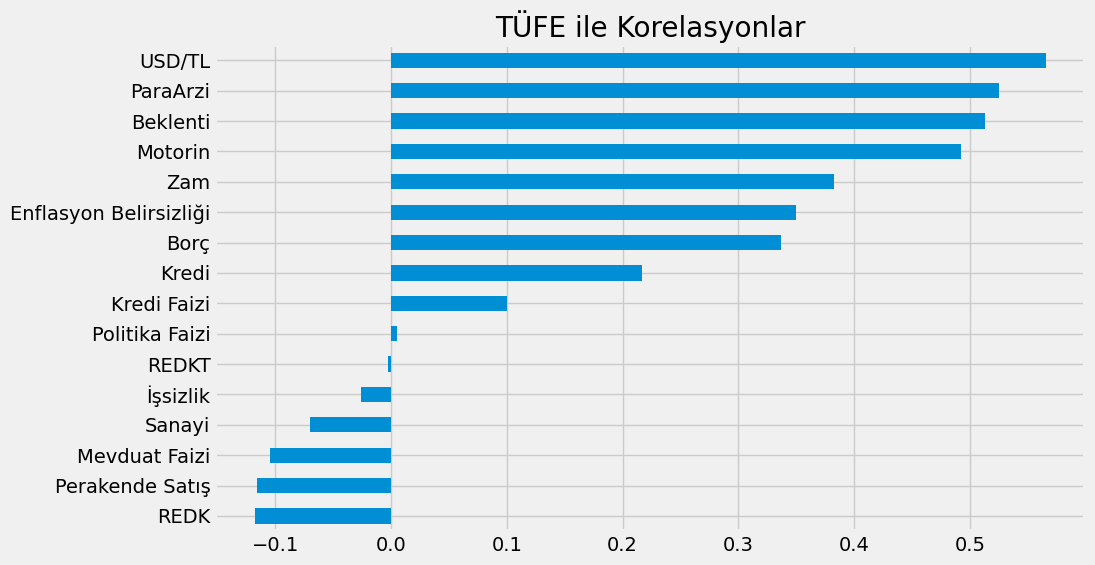

In [84]:
cor_matrix=data1.corr()
cor_matrix=(cor_matrix["TÜFE"]).sort_values(ascending=True)
cor_matrix[:-1].plot(kind="barh",title="TÜFE ile Korelasyonlar",figsize=(10,6))

In [85]:
data.iloc[-1,4]=49.11

In [86]:
data=data.drop(["Perakende Satış","Kredi Faizi","Sanayi"],axis=1)

In [87]:
model=auto_arima(pfaiz["Politika Faizi"],seasonal=False,information_criterion="bic")
model_fit = model.fit(pfaiz["Politika Faizi"])
faiztahmin = model_fit.predict(25)
faiztahmin=pd.DataFrame(faiztahmin)
faiztahmin.columns=["Politika Faizi"]
row=pd.DataFrame({"Politika Faizi":pfaiz.iloc[-8:,0]},index=pd.date_range(start="2023-08-30",periods=7,freq="1M"))
faiztahmin=pd.concat([row,faiztahmin],axis=0)
faiztahmin.iloc[4:,0]=[42.5,45,45,45,45,45,45,45,45,45,42.5,40,37.5,35,35,35,35,35,35,35,32.5,30,27.5,25,25,25,25,25]
faiztahmin

,Politika Faizi
2023-08-31,23.50
2023-09-30,31.00
2023-10-31,33.00
2023-11-30,41.09
2023-12-31,42.50
2024-01-31,45.00
2024-02-29,45.00
2024-03-31,45.00
2024-04-30,45.00
2024-05-31,45.00


In [88]:
model=auto_arima(kfaiz["Kredi Faizi"],seasonal=True,X=np.array(pfaiz["Politika Faizi"]).reshape(-1,1),information_criterion="aic",m=9)
model_fit = model.fit(kfaiz["Kredi Faizi"])

forecast = model_fit.predict(25,X=np.array(faiztahmin["Politika Faizi"][7:]).reshape(-1,1))
kfaiztahmin=pd.DataFrame(forecast)
kfaiztahmin.columns=["Kredi Faizi"]
new_row=pd.DataFrame({"Kredi Faizi":kfaiz.iloc[211:,0]},index=kfaiz.index[211:])
kfaiztahmin=pd.concat([new_row,kfaiztahmin],axis=0)
kfaiztahmin



,Kredi Faizi
2023-09-30,57.560000
2023-10-31,58.430000
2023-11-30,58.610000
2023-12-31,58.160000
2024-01-31,59.410000
2024-02-29,59.310000
2024-03-31,59.534424
2024-04-30,60.105010
2024-05-31,60.604361
2024-06-30,60.774992


In [89]:
trainexog=kfaiz[47:-2]
trainexog

,Kredi Faizi
2010-01-31,13.76
2010-02-28,13.36
2010-03-31,13.10
2010-04-30,13.18
2010-05-31,13.25
...,...
2023-08-31,45.29
2023-09-30,57.56
2023-10-31,58.43
2023-11-30,58.61


In [90]:
testexog=kfaiztahmin[2:]
testexog

,Kredi Faizi
2023-11-30,58.610000
2023-12-31,58.160000
2024-01-31,59.410000
2024-02-29,59.310000
2024-03-31,59.534424
2024-04-30,60.105010
2024-05-31,60.604361
2024-06-30,60.774992
2024-07-31,60.616609
2024-08-31,60.312178


In [91]:
faiztahmin[5:]

,Politika Faizi
2024-01-31,45.0
2024-02-29,45.0
2024-03-31,45.0
2024-04-30,45.0
2024-05-31,45.0
2024-06-30,45.0
2024-07-31,45.0
2024-08-31,45.0
2024-09-30,45.0
2024-10-31,42.5


In [92]:
model=auto_arima(mfaiz["Mevduat Faizi"],X=pfaiz,trace=False,seasonal=False,information_criterion="aic")
mfaiztahmin=pd.DataFrame(model.predict(26,X=faiztahmin[6:]))
mfaiztahmin.columns=["Mevduat Faizi"]
row=pd.DataFrame({"Mevduat Faizi":mfaiz.iloc[-2:,0]},index=pd.date_range(start="2024-01-30",periods=2,freq="1M"))
mfaiztahmin=pd.concat([row,mfaiztahmin],axis=0)
mfaiztahmin


,Mevduat Faizi
2024-01-31,49.610000
2024-02-29,52.030000
2024-03-31,54.961967
2024-04-30,52.098734
2024-05-31,52.514952
2024-06-30,54.165931
2024-07-31,52.441552
2024-08-31,52.776990
2024-09-30,53.697768
2024-10-31,52.663462


In [93]:
trainexog=pd.DataFrame()
trainexog["Dolar"]=usd.iloc[-16:-6,0].rolling(2).mean().dropna()*df14.iloc[:-6,0]
trainexog=trainexog.dropna()
trainexog=np.array(trainexog).reshape(-1,1)
testexog=pd.DataFrame()
testexog["Dolar"]=usd.iloc[-7:,0].rolling(2).mean().dropna()*df14.iloc[-6:,0]
testexog=testexog.dropna()
testexog=np.array(testexog).reshape(-1,1)

In [94]:
exog=pd.DataFrame()
exog["X"]=usd["TP_DK_USD_S_YTL"].rolling(2).mean().dropna()*df14["Brent"]
exog=exog.dropna()
exog
#exog=np.array(exog).reshape(-1,1)


,X
2007-07-31,99.454046
2007-08-31,92.519699
2007-09-30,99.580871
2007-10-31,101.824103
2007-11-30,110.143119
...,...
2023-10-31,2432.069312
2023-11-30,2316.594077
2023-12-31,2231.258978
2024-01-31,2341.408383


In [95]:

zamtahmin=pd.DataFrame()
zamtahmin["Zam"]=[0,0,0,0,0,49.11,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,25]
zamtahmin.columns=["Zam"]
zamtahmin=zamtahmin.set_index(pd.date_range(start="2023-08-30",end="2026-02-27",freq="1M"))
zamtahmin

,Zam
2023-08-31,0.00
2023-09-30,0.00
2023-10-31,0.00
2023-11-30,0.00
2023-12-31,0.00
2024-01-31,49.11
2024-02-29,0.00
2024-03-31,0.00
2024-04-30,0.00
2024-05-31,0.00


In [96]:
faiztahmin.columns=["Faiz"]


In [97]:
exogtrain=pd.DataFrame()
exogtrain["Faiz"]=pfaiz["Politika Faizi"].iloc[95:-14]
exogtrain=np.array(exogtrain).reshape(-1,1)

exogtest=pd.DataFrame()
exogtest=pd.concat([pfaiz["Politika Faizi"].iloc[-14:-2],faiztahmin.iloc[2:,0]],axis=0)
exogtest=np.array(exogtest).reshape(-1,1)



In [98]:
exog=pfaiz["Politika Faizi"].iloc[95:-2]
exog=np.array(exog).reshape(-1,1)

In [99]:
exogtest=faiztahmin.iloc[4:]
exogtest=np.array(exogtest).reshape(-1,1)

In [100]:
model=auto_arima(issizlik,seasonal=True,m=3,X=exog)
model_fit = model.fit(issizlik,X=exog)
issizliktahmin = model_fit.predict(28,X=exogtest)
issizliktahmin=pd.DataFrame(issizliktahmin)
issizliktahmin.columns=["İşsizlik"]
issizliktahmin

,İşsizlik
2024-01-31,8.716523
2024-02-29,8.924516
2024-03-31,8.923326
2024-04-30,8.951931
2024-05-31,9.068261
2024-06-30,9.116040
2024-07-31,9.170229
2024-08-31,9.248216
2024-09-30,9.303553
2024-10-31,9.358690


In [101]:
from prophet import Prophet


In [102]:
df6.shape

(217, 1)

In [103]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"])

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df6.index
    sn["y"]=df6.values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"])
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(df6.values,predictions["yhat"][:-13])
    return mae_score
try:
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=1000)
    print("Optimize işlemi başarıyla tamamlandı.")
except Exception as e:
    print(f'Hata oluştu: {e}')
    print('Optimize işlemi başarısız oldu. Devam ediyor...')
"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"])\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df6.index\n    sn["y"]=df6.values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],se

In [104]:
"""study.best_params"""

'study.best_params'

In [105]:
sn=pd.DataFrame()
sn["ds"]=df6.index
sn["y"]=df6.values
prophet=Prophet(growth="linear",changepoint_prior_scale=8.966616002895412,changepoint_range=0.9704631745207867,seasonality_prior_scale=6.536685782383086,n_changepoints=78,interval_width=0.70,yearly_seasonality=False,weekly_seasonality=False)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=26,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

18:45:38 - cmdstanpy - INFO - Chain [1] start processing
18:45:39 - cmdstanpy - INFO - Chain [1] done processing


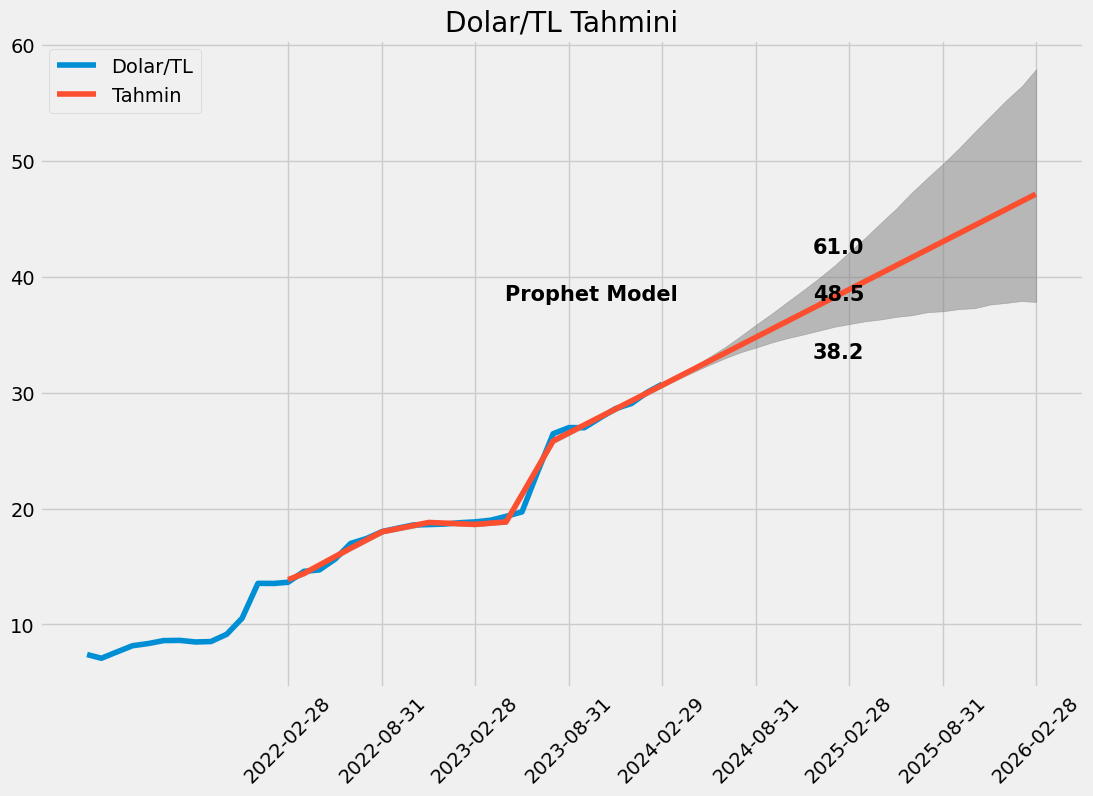

In [106]:
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.plot(df6["USD/TL"][-38:],label='Dolar/TL')
plt.plot(predictions["yhat"][-51:-2],label='Tahmin')
annotation_date = mdates.datestr2num('2025-03-30')
annotation_date1 = mdates.datestr2num('2024-03-30')
plt.text(annotation_date1, 38,  "Prophet Model",fontsize=15, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 38,  str(predictions["yhat"][-1])[:4],fontsize=15, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 33,  str(predictions["yhat_lower"][-1])[:4],fontsize=15, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 42,  str(predictions["yhat_upper"][-1])[:4],fontsize=15, color='black', horizontalalignment='right',fontweight='bold')
plt.fill_between(predictions["yhat"][-51:-1].index.strftime("%Y-%m"), predictions["yhat_upper"][-51:-1].shift(1), predictions["yhat_lower"][-51:-1].shift(1), alpha=0.5, color='gray')
plt.xticks(predictions.index[-51:-2:6],rotation=45)
plt.title('Dolar/TL Tahmini')
plt.legend(loc=2)

In [107]:
usdtahmin=(predictions["yhat"][-27:].pct_change(periods=1)*100).dropna()
usdtahmin

ds
2024-03-31    2.283094
2024-04-30    2.160128
2024-05-31    2.184935
2024-06-30    2.069242
2024-07-31    2.094868
2024-08-31    2.051884
2024-09-30    1.945769
2024-10-31    1.972253
2024-11-30    1.871717
2024-12-31    1.898572
2025-01-31    1.863197
2025-02-28    1.652106
2025-03-31    1.799389
2025-04-30    1.710565
2025-05-31    1.737857
2025-06-30    1.653069
2025-07-31    1.680393
2025-08-31    1.652622
2025-09-30    1.573311
2025-10-31    1.600573
2025-11-30    1.524540
2025-12-31    1.551702
2026-01-31    1.527992
2026-02-28    1.359351
2026-03-31    1.484812
2026-04-30    1.415891
Name: yhat, dtype: float64

In [108]:
usdtahmin1 = []
result = df6.iloc[-1,0]
for i in range(len(usdtahmin)):
    result *= (1 + usdtahmin[i] / 100)
    usdtahmin1.append(result)

usdtahmin1 = np.array(usdtahmin1).reshape(-1, 1)
usdtahmin1 = pd.DataFrame(usdtahmin1)
usdtahmin1.columns = ["USD/TL"]
usdtahmin1=pd.concat([df6.iloc[-6:],usdtahmin1],axis=0)
usdtahmin1 = usdtahmin1.set_index(pd.date_range(start="2023-09-30", periods=len(usdtahmin1), freq="1M"))
usdtahmin1

,USD/TL
2023-09-30,26.989448
2023-10-31,27.846114
2023-11-30,28.637082
2023-12-31,29.074857
2024-01-31,30.053750
2024-02-29,30.741900
2024-03-31,31.443766
2024-04-30,32.122992
2024-05-31,32.824859
2024-06-30,33.504084


In [109]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'growth':trial.suggest_categorical('growth',['linear'])
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df14[50:].index
    sn["y"]=df14[50:].values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df14[50:].index\n    sn["y"]=df14[50:].values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predictions=prophet.predict(future_dates)\n    predictions=predictions.set_index(predictions["ds"])\n    \n    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])\n    return mae_score\nstudy = optuna.create_study(direction=

In [110]:
"""study.best_params"""

'study.best_params'

In [111]:
sn=pd.DataFrame()
sn["ds"]=df14[50:].index
sn["y"]=df14[50:].values
prophet=Prophet(growth="linear",changepoint_prior_scale=8.441645091305189,changepoint_range=0.9896533088928638,seasonality_prior_scale=6.984796984939141,n_changepoints=96)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

18:45:39 - cmdstanpy - INFO - Chain [1] start processing


18:45:40 - cmdstanpy - INFO - Chain [1] done processing


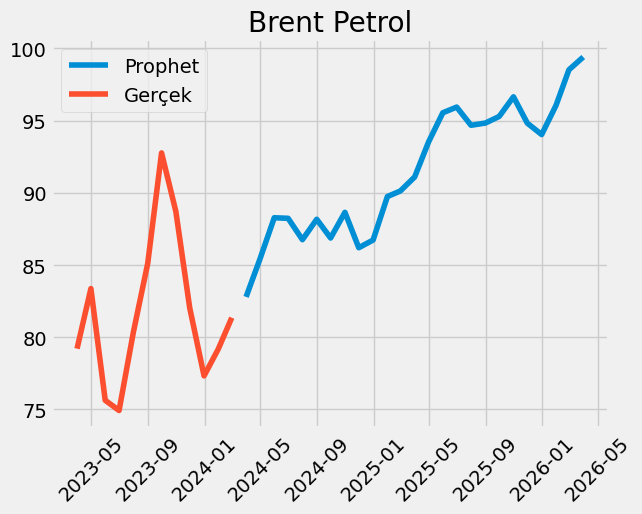

In [112]:
plt.title("Brent Petrol")
plt.plot(predictions["yhat"][-25:],label="Prophet")
plt.plot(df14["Brent"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [113]:
brenttahmin=predictions["yhat"][-29:]
brenttahmin

ds
2023-11-30    84.578462
2023-12-31    77.555282
2024-01-31    77.692570
2024-02-29    81.768344
2024-03-31    82.793018
2024-04-30    85.413333
2024-05-31    88.275348
2024-06-30    88.235874
2024-07-31    86.756806
2024-08-31    88.168727
2024-09-30    86.870983
2024-10-31    88.650687
2024-11-30    86.199396
2024-12-31    86.731474
2025-01-31    89.744486
2025-02-28    90.129721
2025-03-31    91.098525
2025-04-30    93.515360
2025-05-31    95.546800
2025-06-30    95.939684
2025-07-31    94.680895
2025-08-31    94.832208
2025-09-30    95.290563
2025-10-31    96.651349
2025-11-30    94.825146
2025-12-31    94.037206
2026-01-31    96.050055
2026-02-28    98.519834
2026-03-31    99.406290
Name: yhat, dtype: float64

In [114]:
"""brenttahmin=pd.read_csv("C:/Users/Bora/Downloads/brent_forecast.csv")
brenttahmin=brenttahmin.set_index(brenttahmin["Unnamed: 0"])
del brenttahmin["Unnamed: 0"]
brenttahmin.index.name="" 
brenttahmin"""

'brenttahmin=pd.read_csv("C:/Users/Bora/Downloads/brent_forecast.csv")\nbrenttahmin=brenttahmin.set_index(brenttahmin["Unnamed: 0"])\ndel brenttahmin["Unnamed: 0"]\nbrenttahmin.index.name="" \nbrenttahmin'

In [115]:
sn=pd.DataFrame()
sn["ds"]=enf_belirsizlik.index
sn["y"]=enf_belirsizlik.values
sn["USD"]=df6.values[88:]

In [116]:
(df6.pct_change()*100)[88:].dropna()

,USD/TL
Tarih,
2013-06-30,3.935544
2013-07-31,1.899464
2013-08-31,1.254202
2013-09-30,3.194974
2013-10-31,-1.331283
...,...
2023-10-31,3.174078
2023-11-30,2.840498
2023-12-31,1.528701


In [117]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'growth':trial.suggest_categorical('growth',['linear'])

            

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=enf_belirsizlik.index
    sn["y"]=enf_belirsizlik.values
    sn["USD"]=(df6.pct_change()*100)[88:].dropna().values
    prophet=Prophet(**params)
    prophet.add_regressor('USD')
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    future_dates["USD"]=pd.concat([sn["USD"],usdtahmin.head(13)],axis=0).values
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n\n            \n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=enf_belirsizlik.index\n    sn["y"]=enf_belirsizlik.values\n    sn["USD"]=(df6.pct_change()*100)[88:].dropna().values\n    prophet=Prophet(**params)\n    prophet.add_regressor(\'USD\')\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    future_dates["USD"]=pd.concat([sn["USD"],usdtahmin.head(13)],axis=0).values\n    predictions=prophet.predict(futur

In [118]:
"""study.best_params"""

'study.best_params'

18:45:41 - cmdstanpy - INFO - Chain [1] start processing


18:45:41 - cmdstanpy - INFO - Chain [1] done processing


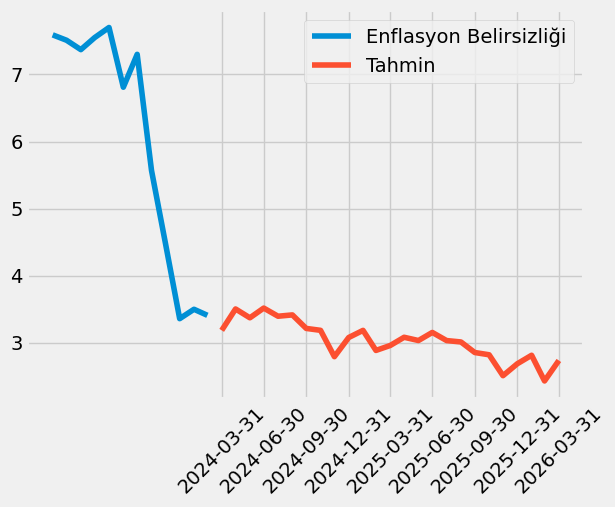

In [119]:
sn=pd.DataFrame()
sn["ds"]=enf_belirsizlik.index
sn["y"]=enf_belirsizlik.values
sn["USD"]=(df6.pct_change()*100)[88:].dropna().values
prophet=Prophet(changepoint_prior_scale=5.942178380780244,changepoint_range=0.9889303340443824,seasonality_prior_scale=4.612794030759727,n_changepoints=44,growth="linear")
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
future_dates["USD"]=pd.concat([sn["USD"],usdtahmin.head(25)],axis=0).values
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])
plt.plot(enf_belirsizlik[-12:],label="Enflasyon Belirsizliği")
plt.plot(predictions["yhat"][-25:],label="Tahmin")
plt.xticks(predictions.index[-25::3],rotation=45)
plt.legend()


In [120]:
enfbelirsizliktahmin1=pd.DataFrame(predictions["yhat"][-26:])
enfbelirsizliktahmin1.columns=["Enflasyon Belirsizliği"]
enfbelirsizliktahmin1.index.names=[""]
enfbelirsizliktahmin1.iloc[0,0]=enf_belirsizlik.iloc[-1,0]
enfbelirsizliktahmin1

,Enflasyon Belirsizliği
,
2024-02-29,3.410000
2024-03-31,3.185794
2024-04-30,3.504568
2024-05-31,3.372782
2024-06-30,3.517948
2024-07-31,3.396365
2024-08-31,3.415980
2024-09-30,3.214621
2024-10-31,3.186206


In [121]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',[0.01,10]),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].index
    sn["y"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][-12:],predictions["yhat"].tail(12))
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',[0.01,10]),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][p

In [122]:
#study.best_params

In [123]:
sn=pd.DataFrame()
sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][80:].index
sn["y"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][80:].values
sn["cap"]=190
prophet=Prophet(changepoint_prior_scale=3.481321992729419,changepoint_range=0.8995930316928846,growth='linear',seasonality_prior_scale=8.977376335194005,yearly_seasonality=True,weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=27,freq="M")
future_dates["cap"]=190
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

18:45:42 - cmdstanpy - INFO - Chain [1] start processing


18:45:42 - cmdstanpy - INFO - Chain [1] done processing


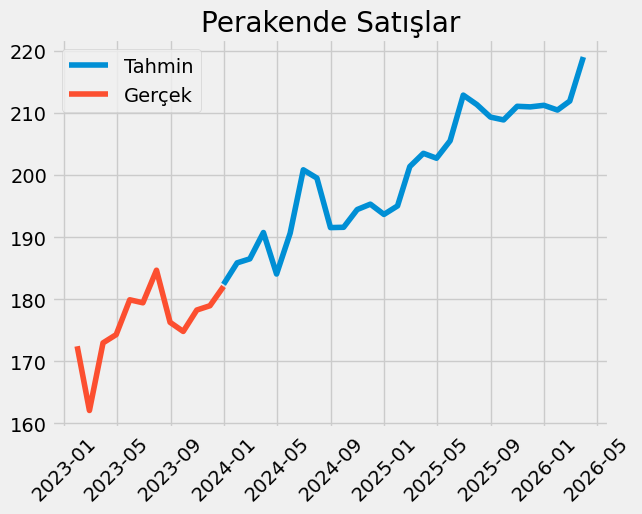

In [124]:
plt.title("Perakende Satışlar")
plt.plot(predictions["yhat"][-28:],label="Tahmin")
plt.plot(perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [125]:
perakendetahmin=(predictions["yhat"][-28:].pct_change(periods=1)*100).dropna()
perakendetahmin

ds
2024-01-31    1.899453
2024-02-29    0.347187
2024-03-31    2.275449
2024-04-30   -3.506735
2024-05-31    3.578296
2024-06-30    5.356224
2024-07-31   -0.663651
2024-08-31   -3.999949
2024-09-30    0.025459
2024-10-31    1.493126
2024-11-30    0.446150
2024-12-31   -0.845813
2025-01-31    0.708612
2025-02-28    3.251780
2025-03-31    1.059153
2025-04-30   -0.388384
2025-05-31    1.389245
2025-06-30    3.578033
2025-07-31   -0.716229
2025-08-31   -0.953721
2025-09-30   -0.217622
2025-10-31    1.049791
2025-11-30   -0.043539
2025-12-31    0.119629
2026-01-31   -0.361156
2026-02-28    0.688540
2026-03-31    3.348129
Name: yhat, dtype: float64

In [126]:
((usdtahmin1[2:-1].pct_change(periods=1)*100).dropna())

,USD/TL
2023-12-31,1.528701
2024-01-31,3.366802
2024-02-29,2.289731
2024-03-31,2.283094
2024-04-30,2.160128
2024-05-31,2.184935
2024-06-30,2.069242
2024-07-31,2.094868
2024-08-31,2.051884
2024-09-30,1.945769


In [127]:
brenttahmin1=(brenttahmin.pct_change()*100).dropna()
brenttahmin1

ds
2023-12-31   -8.303745
2024-01-31    0.177021
2024-02-29    5.246028
2024-03-31    1.253142
2024-04-30    3.164898
2024-05-31    3.350783
2024-06-30   -0.044717
2024-07-31   -1.676265
2024-08-31    1.627447
2024-09-30   -1.471887
2024-10-31    2.048675
2024-11-30   -2.765112
2024-12-31    0.617264
2025-01-31    3.473955
2025-02-28    0.429258
2025-03-31    1.074900
2025-04-30    2.652990
2025-05-31    2.172306
2025-06-30    0.411194
2025-07-31   -1.312063
2025-08-31    0.159814
2025-09-30    0.483333
2025-10-31    1.428038
2025-11-30   -1.889475
2025-12-31   -0.830939
2026-01-31    2.140481
2026-02-28    2.571346
2026-03-31    0.899774
Name: yhat, dtype: float64

In [128]:
motorintahmin=pd.DataFrame((1+(((usdtahmin1[2:-1].pct_change(periods=1)*100).dropna())/100)).values*(1+(((brenttahmin1).dropna())/100)).values.reshape(-1,1))
motorintahmin.columns=["Motorin"]
motorintahmin=motorintahmin.set_index(pd.date_range(start="2023-12-30",periods=len(motorintahmin),freq="1M"))
motorintahmin.iloc[0,0]=(motorin.pct_change(periods=1)*100).iloc[-1,0]
motorintahmin[1:]=((motorintahmin[1:])-1)*100
motorintahmin

,Motorin
2023-12-31,5.678074
2024-01-31,3.549783
2024-02-29,7.655879
2024-03-31,3.564847
2024-04-30,5.393392
2024-05-31,5.608931
2024-06-30,2.023599
2024-07-31,0.383487
2024-08-31,3.712725
2024-09-30,0.445243


In [129]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=money["Para Arzi"].index
    sn["y"]=money["Para Arzi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(money["Para Arzi"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=money["Para Arzi"].index\n    sn["y"]=money["Para Arzi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_rang

In [130]:
"""study.best_params"""

'study.best_params'

In [131]:
sn=pd.DataFrame()
sn["ds"]=money["Para Arzi"].index
sn["y"]=money["Para Arzi"].values
prophet=Prophet(changepoint_prior_scale=4.9385825316091445,changepoint_range=0.9538315586393957,growth='linear',seasonality_prior_scale=4.314940386271349,n_changepoints=76,yearly_seasonality="auto",weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

18:45:43 - cmdstanpy - INFO - Chain [1] start processing


18:45:43 - cmdstanpy - INFO - Chain [1] done processing


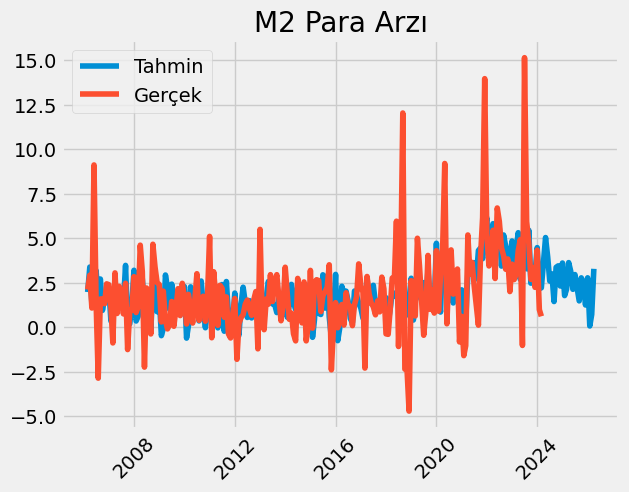

In [132]:
plt.title("M2 Para Arzı")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(money["Para Arzi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [133]:
paraarzitahmin=(predictions["yhat"]).tail(25)
paraarzitahmin

ds
2024-03-31    3.660375
2024-04-30    5.042583
2024-05-31    3.954099
2024-06-30    2.600338
2024-07-31    3.005579
2024-08-31    1.448433
2024-09-30    3.371299
2024-10-31    3.455520
2024-11-30    2.320829
2024-12-31    3.611730
2025-01-31    1.781192
2025-02-28    2.129751
2025-03-31    3.637401
2025-04-30    3.148284
2025-05-31    2.134285
2025-06-30    2.964564
2025-07-31    2.235755
2025-08-31    1.483671
2025-09-30    2.779589
2025-10-31    2.463211
2025-11-30    1.254403
2025-12-31    2.781839
2026-01-31    0.074586
2026-02-28    0.723642
2026-03-31    3.286686
Name: yhat, dtype: float64

In [134]:
paraarzitahmin1 = paraarzitahmin
paraarzitahmin1 = np.array(paraarzitahmin1).reshape(-1, 1)
paraarzitahmin1 = pd.DataFrame(paraarzitahmin1)
paraarzitahmin1.columns = ["Para Arzi"]
paraarzitahmin1 = paraarzitahmin1.set_index(pd.date_range(start="2024-03-31", periods=len(paraarzitahmin), freq="1M"))
row=pd.DataFrame({"Para Arzi":money.iloc[-4:,0]},index=pd.date_range(start="2023-11-30",periods=4,freq="M"))
paraarzitahmin1=pd.concat([row,paraarzitahmin1])
paraarzitahmin1

,Para Arzi
2023-11-30,2.245991
2023-12-31,4.333376
2024-01-31,0.993354
2024-02-29,0.618607
2024-03-31,3.660375
2024-04-30,5.042583
2024-05-31,3.954099
2024-06-30,2.600338
2024-07-31,3.005579
2024-08-31,1.448433


In [135]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=borc["Borç"][params["m"]:-12].index
    sn["y"]=borc["Borç"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(borc["Borç"][-12:],predictions["yhat"][-12:])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=borc["Borç"][params["m"]:-12].index\n    sn["y"]=borc["Borç

In [136]:
#study.best_params

In [137]:
sn=pd.DataFrame()
sn["ds"]=borc["Borç"][103:].index
sn["y"]=borc["Borç"][103:].values
sn["cap"]=100
prophet=Prophet(changepoint_prior_scale=3.671534257218686,changepoint_range=0.8995013103592469,growth='linear',seasonality_prior_scale=4.464356522636207,n_changepoints=2)

prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=26,freq="M")
future_dates["cap"]=100
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

18:45:44 - cmdstanpy - INFO - Chain [1] start processing
18:45:44 - cmdstanpy - INFO - Chain [1] done processing


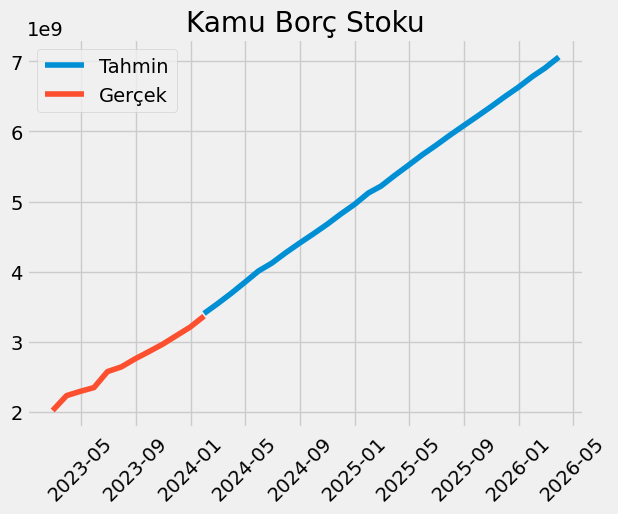

In [138]:
plt.title("Kamu Borç Stoku")
plt.plot(predictions["yhat"][-27:],label="Tahmin")
plt.plot(borc["Borç"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [139]:
borctahmin=(predictions["yhat"].pct_change(periods=1)*100).tail(26)
borctahmin

ds
2024-02-29    3.931115
2024-03-31    4.257236
2024-04-30    4.213795
2024-05-31    4.275757
2024-06-30    2.843438
2024-07-31    3.593886
2024-08-31    3.232160
2024-09-30    2.921967
2024-10-31    3.036143
2024-11-30    3.089515
2024-12-31    2.899262
2025-01-31    3.283513
2025-02-28    1.914112
2025-03-31    2.957358
2025-04-30    2.646211
2025-05-31    2.720277
2025-06-30    2.347082
2025-07-31    2.488168
2025-08-31    2.317654
2025-09-30    2.172175
2025-10-31    2.228737
2025-11-30    2.207552
2025-12-31    2.114284
2026-01-31    2.294370
2026-02-28    1.777334
2026-03-31    2.284275
Name: yhat, dtype: float64

In [140]:
borctahmin1 = []
result = borc.iloc[-1,0]
for i in range(len(borctahmin)):
    result *= (1 + borctahmin[i] / 100)
    borctahmin1.append(result)

borctahmin1 = np.array(borctahmin1).reshape(-1, 1)
borctahmin1 = pd.DataFrame(borctahmin1)
borctahmin1.columns = ["Borç"]
borctahmin1 = borctahmin1.set_index(pd.date_range(start="2024-02-28", periods=len(borctahmin1), freq="1M"))
row=pd.DataFrame({"Borç":borc.iloc[-4:,0]},index=pd.date_range(start="2023-10-30",periods=4,freq="1M"))
borctahmin1=pd.concat([row,borctahmin1],axis=0)
borctahmin1

,Borç
2023-10-31,2.966763e+09
2023-11-30,3.086466e+09
2023-12-31,3.209252e+09
2024-01-31,3.366451e+09
2024-02-29,3.498790e+09
2024-03-31,3.647741e+09
2024-04-30,3.801450e+09
2024-05-31,3.963991e+09
2024-06-30,4.076704e+09
2024-07-31,4.223216e+09


In [141]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 15),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,15),
                'n_changepoints':trial.suggest_int('n_changepoints',1,200),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),


                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df3["Kredi"].index
    sn["y"]=df3["Kredi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(df3.values,predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 15),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,15),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,200),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df3["Kredi"].index\n    sn["y"]=df3["Kredi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growt

In [142]:
"""study.best_params"""

'study.best_params'

In [143]:
sn=pd.DataFrame()
sn["ds"]=df3["Kredi"].index
sn["y"]=df3["Kredi"].values
prophet=Prophet(changepoint_prior_scale=14.571144908454663,changepoint_range=0.8904873855141803,growth="linear",seasonality_prior_scale=1.5574317873100854,n_changepoints=192,yearly_seasonality=True,weekly_seasonality=True)

prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

18:45:45 - cmdstanpy - INFO - Chain [1] start processing


18:45:46 - cmdstanpy - INFO - Chain [1] done processing


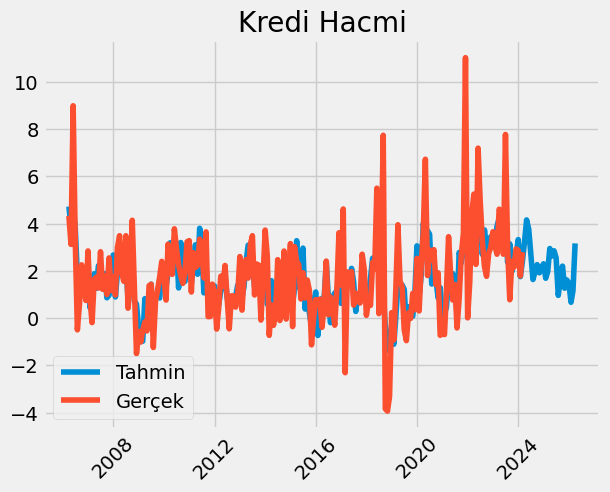

In [144]:
plt.title("Kredi Hacmi")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(df3["Kredi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [145]:
kreditahmin=(predictions["yhat"]).tail(25)
kreditahmin

ds
2024-03-31    3.231654
2024-04-30    4.160449
2024-05-31    3.761711
2024-06-30    2.715171
2024-07-31    1.637749
2024-08-31    1.992132
2024-09-30    2.266942
2024-10-31    1.920724
2024-11-30    2.135318
2024-12-31    2.302235
2025-01-31    1.691030
2025-02-28    1.965164
2025-03-31    2.949861
2025-04-30    2.633080
2025-05-31    2.852218
2025-06-30    2.555796
2025-07-31    0.965662
2025-08-31    1.702166
2025-09-30    2.204483
2025-10-31    1.268865
2025-11-30    1.621197
2025-12-31    1.490992
2026-01-31    0.673692
2026-02-28    1.156411
2026-03-31    3.166607
Name: yhat, dtype: float64

In [146]:
kreditahmin1 = kreditahmin

kreditahmin1 = np.array(kreditahmin1).reshape(-1, 1)
kreditahmin1 = pd.DataFrame(kreditahmin1)
kreditahmin1.columns = ["Kredi"]
kreditahmin1 = kreditahmin1.set_index(pd.date_range(start="2024-03-31", periods=len(kreditahmin1), freq="1M"))
row=pd.DataFrame({"Kredi":df3.iloc[-4:,0]},index=pd.date_range(start="2023-11-30",periods=4,freq="1M"))
kreditahmin1=pd.concat([row,kreditahmin1],axis=0)
kreditahmin1

,Kredi
2023-11-30,2.932091
2023-12-31,2.873464
2024-01-31,1.789324
2024-02-29,2.794912
2024-03-31,3.231654
2024-04-30,4.160449
2024-05-31,3.761711
2024-06-30,2.715171
2024-07-31,1.637749
2024-08-31,1.992132


In [147]:
'''def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,200),
                'cap':trial.suggest_float('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=m3["M3 Para Arzi"][params["m"]:-12].index
    sn["y"]=m3["M3 Para Arzi"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(m3["M3 Para Arzi"][-12:],predictions["yhat"][-12:])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,200),\n                \'cap\':trial.suggest_float(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=m3["M3 Para Arzi"][params["m"]:-12].index\n    sn["y"]=m3["M3 Para Arzi"][

In [148]:
#study.best_params

In [149]:
sn=pd.DataFrame()
sn["ds"]=m3["M3 Para Arzi"][151:].index
sn["y"]=m3["M3 Para Arzi"][151:].values
sn["cap"]=386.728728252815
prophet=Prophet(changepoint_prior_scale=1.0239522189165728,changepoint_range=0.8631788185438879,growth='logistic',seasonality_prior_scale=8.271825948806738,n_changepoints=14,yearly_seasonality="auto",weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
future_dates["cap"]=386.728728252815
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

18:45:46 - cmdstanpy - INFO - Chain [1] start processing


18:45:48 - cmdstanpy - INFO - Chain [1] done processing


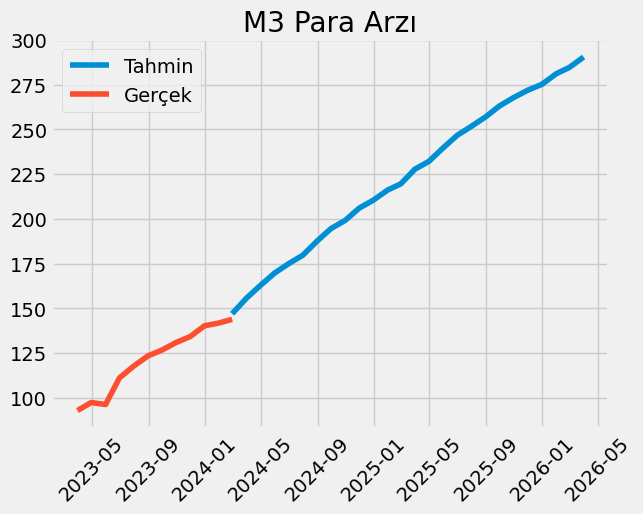

In [150]:
plt.title("M3 Para Arzı")
plt.plot(predictions["yhat"][-26:],label="Tahmin")
plt.plot(m3["M3 Para Arzi"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [151]:
m3tahmin=(predictions["yhat"].tail(26).pct_change(periods=1)*100).dropna()
m3tahmin1 = []
result = m3.iloc[-1,0]
for i in range(len(m3tahmin)):
    result *= (1 + m3tahmin[i] / 100)
    m3tahmin1.append(result)

m3tahmin1 = np.array(m3tahmin1).reshape(-1, 1)
m3tahmin1 = pd.DataFrame(m3tahmin1)
m3tahmin1.columns = ["M3"]
m3tahmin1 = m3tahmin1.set_index(pd.date_range(start="2024-02-28", periods=len(m3tahmin1), freq="1M"))
row=pd.DataFrame({"M3":m3.iloc[-4:,0]},index=pd.date_range(start="2023-10-30",periods=4,freq="1M"))
m3tahmin1=pd.concat([row,m3tahmin1],axis=0)
m3tahmin1

,M3
2023-10-31,NaN
2023-11-30,134.161244
2023-12-31,140.183543
2024-01-31,141.754955
2024-02-29,152.342863
2024-03-31,159.268914
2024-04-30,166.087088
2024-05-31,171.140178
2024-06-30,175.825782
2024-07-31,183.565167


In [152]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_float('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=sanayi["Sanayi"].index
    sn["y"]=sanayi["Sanayi"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=15,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sanayi["Sanayi"],predictions["yhat"][:-15])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=2000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_float(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=sanayi["Sanayi"].index\n    sn["y"]=sanayi["Sanayi"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(cha

In [153]:
#study.best_params

In [154]:
sn=pd.DataFrame()
sn["ds"]=sanayi["Sanayi"].index
sn["y"]=sanayi["Sanayi"].values
prophet=Prophet(changepoint_prior_scale=9.619978429571834,changepoint_range=0.8872026398316396,growth='linear',seasonality_prior_scale=4.66384076344283,n_changepoints=25,yearly_seasonality="auto",weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=27,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

18:45:49 - cmdstanpy - INFO - Chain [1] start processing
18:45:49 - cmdstanpy - INFO - Chain [1] done processing


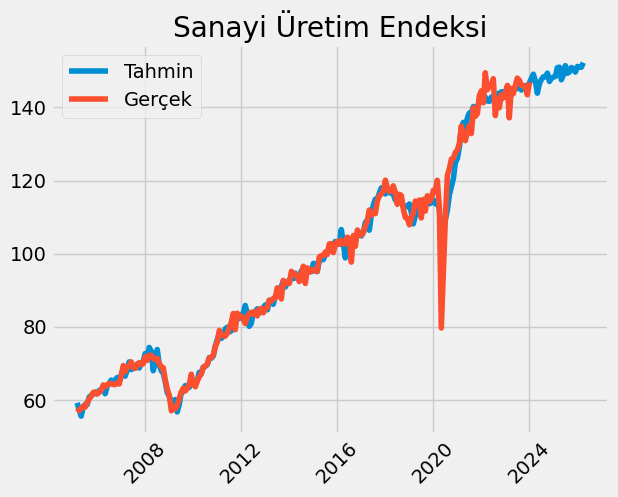

In [155]:
plt.title("Sanayi Üretim Endeksi")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(sanayi["Sanayi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [156]:
sanayitahmin=(predictions["yhat"].tail(28).pct_change(periods=1)*100).dropna()
sanayitahmin1 = []
result = sanayi.iloc[-1,0]
for i in range(len(sanayitahmin)):
    result *= (1 + sanayitahmin[i] / 100)
    sanayitahmin1.append(result)

sanayitahmin1 = np.array(sanayitahmin1).reshape(-1, 1)
sanayitahmin1 = pd.DataFrame(sanayitahmin1)
sanayitahmin1.columns = ["Sanayi"]
sanayitahmin1 = sanayitahmin1.set_index(pd.date_range(start="2024-01-31", periods=len(sanayitahmin1), freq="1M"))
#row=pd.DataFrame({"Sanayi":df3.iloc[-2:,0]},index=pd.date_range(start="2023-10-30",periods=2,freq="1M"))
#sanayitahmin1=pd.concat([row,sanayitahmin1],axis=0)
sanayitahmin1

,Sanayi
2024-01-31,148.172656
2024-02-29,149.304582
2024-03-31,147.440413
2024-04-30,144.090834
2024-05-31,146.699778
2024-06-30,147.812608
2024-07-31,148.585767
2024-08-31,148.601460
2024-09-30,149.580131
2024-10-31,147.325270


In [157]:
redkt=redkt.pct_change()*100
redk=redk.pct_change()*100
redkt=redkt.dropna()
redk=redk.dropna()

In [161]:
"""def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_int('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=redkt["REDKT"].index
    sn["y"]=redkt["REDKT"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=36,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(redkt["REDKT"],predictions["yhat"][:-36])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

[I 2024-02-26 18:48:53,452] A new study created in memory with name: no-name-bc0851f2-25bb-43cc-97f1-33120c161a2a
18:48:53 - cmdstanpy - INFO - Chain [1] start processing
18:48:53 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-02-26 18:48:53,858] Trial 0 finished with value: 10.287922991412437 and parameters: {'changepoint_prior_scale': 5.129816649601656, 'changepoint_range': 0.5587402372757673, 'growth': 'linear', 'seasonality_prior_scale': 9.744253581991352, 'n_changepoints': 7, 'yearly_seasonality': 'auto', 'weekly_seasonality': True, 'cap': 151}. Best is trial 0 with value: 10.287922991412437.
18:48:53 - cmdstanpy - INFO - Chain [1] start processing
18:48:54 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-02-26 18:48:54,207] Trial 1 finished with value: 10.535771219647769 and parameters: {'changepoint_prior_scale': 4.794503603813866, 'changepoint_range': 0.46888671942168814, 'growth': 'logistic', 'seasonality_prior_scale': 1.234000113565511, 'n_changepoints': 12, 'ye

In [162]:
#study.best_params

{'changepoint_prior_scale': 9.989231798653107,
 'changepoint_range': 0.960887868185737,
 'growth': 'linear',
 'seasonality_prior_scale': 2.612910619508741,
 'n_changepoints': 50,
 'yearly_seasonality': 'auto',
 'weekly_seasonality': True,
 'cap': 348}

In [202]:
sn=pd.DataFrame()
sn["ds"]=redkt["REDKT"].iloc[93:].index
sn["y"]=redkt["REDKT"].iloc[93:].values
prophet=Prophet(changepoint_prior_scale=9.989231798653107,
 changepoint_range=0.960887868185737,
 growth='linear',seasonality_prior_scale=2.612910619508741,n_changepoints=50,yearly_seasonality="auto",weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

19:35:55 - cmdstanpy - INFO - Chain [1] start processing
19:36:00 - cmdstanpy - INFO - Chain [1] done processing


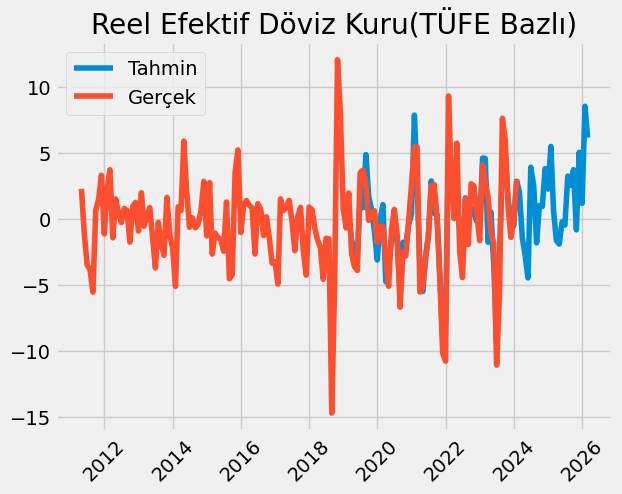

In [195]:
plt.title("Reel Efektif Döviz Kuru(TÜFE Bazlı)")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(redkt["REDKT"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [206]:
predictions["yhat"].tail(25)

ds
2024-02-29    2.058887
2024-03-31   -1.405918
2024-04-30   -2.741350
2024-05-31   -4.456059
2024-06-30    3.920602
2024-07-31    2.525882
2024-08-31   -1.805078
2024-09-30    1.024035
2024-10-31    0.950973
2024-11-30    3.808537
2024-12-31    2.264214
2025-01-31    5.489700
2025-02-28    0.659339
2025-03-31   -1.630437
2025-04-30   -1.897415
2025-05-31   -0.210565
2025-06-30   -0.451161
2025-07-31    3.247641
2025-08-31    2.544710
2025-09-30    3.733734
2025-10-31   -0.814407
2025-11-30    5.045467
2025-12-31    1.181693
2026-01-31    8.529885
2026-02-28    6.155997
Name: yhat, dtype: float64

In [209]:
redkttahmin=predictions["yhat"].tail(25).values
redkttahmin1 = []
result = redkt.iloc[-1,0]
for i in range(len(redkttahmin)):
    result *= (1 + redkttahmin[i] / 100)
    redkttahmin1.append(result)

redkttahmin1 = np.array(redkttahmin1).reshape(-1, 1)
redkttahmin1 = pd.DataFrame(redkttahmin1)
redkttahmin1.columns = ["REDKT"]
redkttahmin1 = redkttahmin1.set_index(pd.date_range(start="2024-02-28", periods=len(redkttahmin1), freq="1M"))
redkttahmin1

,REDKT
2024-02-29,3.064166
2024-03-31,3.021087
2024-04-30,2.938268
2024-05-31,2.807337
2024-06-30,2.917402
2024-07-31,2.991092
2024-08-31,2.937100
2024-09-30,2.967177
2024-10-31,2.995394
2024-11-30,3.109475


In [197]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_int('cap',0,400)
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=redk["REDK"].index
    sn["y"]=redk["REDK"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=26,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"].iloc[:-26])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

[I 2024-02-26 19:01:58,527] A new study created in memory with name: no-name-604d78f3-ae5b-4051-b6f1-8f562b1b651e
19:01:58 - cmdstanpy - INFO - Chain [1] start processing
19:01:58 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-02-26 19:01:58,895] Trial 0 finished with value: 7.547514903690019 and parameters: {'changepoint_prior_scale': 3.8037729697325933, 'changepoint_range': 0.8619951805585073, 'growth': 'linear', 'seasonality_prior_scale': 8.026293708423157, 'n_changepoints': 70, 'yearly_seasonality': True, 'weekly_seasonality': False, 'cap': 251}. Best is trial 0 with value: 7.547514903690019.
19:01:59 - cmdstanpy - INFO - Chain [1] start processing
19:01:59 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-02-26 19:01:59,244] Trial 1 finished with value: 8.504877624820098 and parameters: {'changepoint_prior_scale': 5.826472457229397, 'changepoint_range': 0.5135518303513862, 'growth': 'logistic', 'seasonality_prior_scale': 0.010636754611383031, 'n_changepoints': 23, 'ye

In [198]:
#study.best_params

{'changepoint_prior_scale': 9.940418274244966,
 'changepoint_range': 0.9610240851805488,
 'growth': 'linear',
 'seasonality_prior_scale': 7.183346343813709,
 'n_changepoints': 100,
 'yearly_seasonality': True,
 'weekly_seasonality': True,
 'cap': 288}

In [210]:
sn=pd.DataFrame()
sn["ds"]=redk["REDK"].index
sn["y"]=redk["REDK"].values
prophet=Prophet(changepoint_prior_scale=9.940418274244966,changepoint_range=0.9610240851805488,growth='linear',seasonality_prior_scale=7.183346343813709,n_changepoints=100,yearly_seasonality=True,weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=26,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

19:38:00 - cmdstanpy - INFO - Chain [1] start processing
19:38:01 - cmdstanpy - INFO - Chain [1] done processing


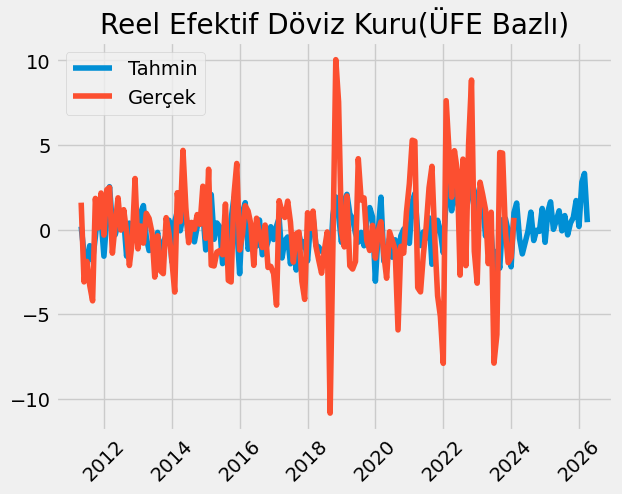

In [200]:
plt.title("Reel Efektif Döviz Kuru(ÜFE Bazlı)")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(redk["REDK"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [213]:
predictions["yhat"].tail(26)

ds
2024-02-29    1.570318
2024-03-31   -0.526021
2024-04-30   -1.436563
2024-05-31   -0.755023
2024-06-30   -0.096398
2024-07-31    1.033167
2024-08-31   -0.644124
2024-09-30   -0.037969
2024-10-31   -0.102678
2024-11-30    1.250308
2024-12-31   -0.749213
2025-01-31    1.089649
2025-02-28    1.640639
2025-03-31    0.016102
2025-04-30    0.525131
2025-05-31    1.111174
2025-06-30   -0.071813
2025-07-31    0.828697
2025-08-31   -0.311247
2025-09-30    0.385603
2025-10-31    0.717414
2025-11-30    1.717813
2025-12-31    0.188475
2026-01-31    2.804970
2026-02-28    3.319683
2026-03-31    0.438366
Name: yhat, dtype: float64

In [214]:
redktahmin=predictions["yhat"].tail(26).values
redktahmin1 = []
result = redk.iloc[-1,0]
for i in range(len(redktahmin)):
    result *= (1 + redktahmin[i] / 100)
    redktahmin1.append(result)

redktahmin1 = np.array(redktahmin1).reshape(-1, 1)
redktahmin1 = pd.DataFrame(redktahmin1)
redktahmin1.columns = ["REDK"]
redktahmin1 = redktahmin1.set_index(pd.date_range(start="2024-02-28", periods=len(redktahmin1), freq="1M"))
redktahmin1

,REDK
2024-02-29,0.709207
2024-03-31,0.705477
2024-04-30,0.695342
2024-05-31,0.690092
2024-06-30,0.689427
2024-07-31,0.696550
2024-08-31,0.692063
2024-09-30,0.691800
2024-10-31,0.691090
2024-11-30,0.699731


In [215]:
motorintahmin.iloc[2]=5.6781
motorintahmin.iloc[1]=8.3196
motorintahmin.iloc[0]=-3.34

In [120]:
"""def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 2),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.001,1.0),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoinst',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"])
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=historical_volatility.index
    sn["y"]=historical_volatility.values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 2),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.001,1.0),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoinst\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"])\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=historical_volatility.index\n    sn["y"]=historical_volatility.values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predict

In [121]:
"""study.best_params"""

'study.best_params'

In [220]:
import statsmodels.api as sm
tahmindf=pd.DataFrame()
tahmindf=pd.concat([usdtahmin1["USD/TL"].rolling(3).mean(),sanayitahmin1["Sanayi"],borctahmin1.shift(1)],axis=1)

tahmindf=tahmindf.pct_change(periods=1)*100
tahmindf["Para Arzi"]=paraarzitahmin1.shift(1)
tahmindf["Enflasyon Belirsizliği"]=enfbelirsizliktahmin1["Enflasyon Belirsizliği"]
tahmindf["Kredi"]=kreditahmin1["Kredi"].rolling(3).mean()
tahmindf["Zam"]=zamtahmin["Zam"]
tahmindf["Motorin"]=motorintahmin["Motorin"]
tahmindf["Kredi Faizi"]=kfaiztahmin["Kredi Faizi"]
tahmindf["Mevduat Faizi"]=mfaiztahmin["Mevduat Faizi"]
tahmindf["İşsizlik"]=issizliktahmin
tahmindf["REDKT"]=redkttahmin1["REDKT"]
tahmindf["REDK"]=redktahmin1["REDK"]
#tahmindf["Politika Faizi"]=faiztahmin["Faiz"]
tahmindf["Perakende Satış"]=perakendetahmin




tahmindf["Politika Faizi"]=[42.5,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,42.5,40,37.5,35,35,35,35,35,35,32.5,30,40,40,40]
tahmindf=tahmindf[['USD/TL', 'Motorin', 'Kredi Faizi', 'Zam',
       'Enflasyon Belirsizliği', 'Para Arzi', 'Borç', 'Kredi', 'Mevduat Faizi','REDKT','REDK','İşsizlik','Politika Faizi',"Sanayi","Perakende Satış"]]

tahmindf.columns=["USD/TL","Motorin","Kredi Faizi","Zam","Enflasyon Belirsizliği",'ParaArzi', 'Borç', 'Kredi', 'Mevduat Faizi','REDKT','REDK','İşsizlik','Politika Faizi',"Sanayi","Perakende Satış"]
tahmindf=tahmindf.dropna(axis=0)










tahmindf.iloc[0,1]=7.98
tahmindf.iloc[0,-5]=0.21
tahmindf.iloc[0,-6]=1.19
tahmindf["Beklenti"]=3.80
tahmindf["Beklenti"].iloc[1:]=0
tahmindf=tahmindf.head(13)
tahmindf

,USD/TL,Motorin,Kredi Faizi,Zam,Enflasyon Belirsizliği,ParaArzi,Borç,Kredi,Mevduat Faizi,REDKT,REDK,İşsizlik,Politika Faizi,Sanayi,Perakende Satış,Beklenti
2024-02-29,2.398224,7.980000,59.310000,0.0,3.410000,0.993354,4.898301,2.485900,52.030000,1.190000,0.210000,8.924516,45.0,0.763924,0.347187,3.8
2024-03-31,2.635914,3.564847,59.534424,0.0,3.185794,0.618607,3.931115,2.605297,54.961967,3.021087,0.705477,8.923326,45.0,-1.248568,2.275449,0.0
2024-04-30,2.243338,5.393392,60.105010,0.0,3.504568,3.660375,4.257236,3.395672,52.098734,2.938268,0.695342,8.951931,45.0,-2.271819,-3.506735,0.0
2024-05-31,2.208661,5.608931,60.604361,0.0,3.372782,5.042583,4.213795,3.717938,52.514952,2.807337,0.690092,9.068261,45.0,1.810625,3.578296,0.0
2024-06-30,2.137445,2.023599,60.774992,0.0,3.517948,3.954099,4.275757,3.545777,54.165931,2.917402,0.689427,9.116040,45.0,0.758577,5.356224,0.0
2024-07-31,2.115711,0.383487,60.616609,0.0,3.396365,2.600338,2.843438,2.704877,52.441552,2.991092,0.696550,9.170229,45.0,0.523067,-0.663651,0.0
2024-08-31,2.071876,3.712725,60.312178,0.0,3.415980,3.005579,3.593886,2.115017,52.776990,2.937100,0.692063,9.248216,45.0,0.010562,-3.999949,0.0
2024-09-30,2.029821,0.445243,60.073265,0.0,3.214621,1.448433,3.232160,1.965608,53.697768,2.967177,0.691800,9.303553,45.0,0.658587,0.025459,0.0
2024-10-31,1.989439,4.061333,60.014006,0.0,3.186206,3.371299,2.921967,2.059933,52.663462,2.995394,0.691090,9.358690,45.0,-1.507460,1.493126,0.0
2024-11-30,1.929430,-0.945150,60.115635,0.0,2.793435,3.455520,3.036143,2.107661,51.700498,3.109475,0.699731,9.431034,45.0,0.610730,0.446150,0.0


In [221]:
data.iloc[-1,2]=49.11
data.iloc[-1,5]=borctahmin.iloc[0]
data.iloc[-1,-4]=9.0

In [222]:
tahmindf=tahmindf.drop(["Sanayi","Perakende Satış","Kredi Faizi"],axis=1)

In [659]:
data1=pd.concat([data,tahmindf],axis=0)
data1

,USD/TL,Motorin,Zam,Enflasyon Belirsizliği,ParaArzi,Borç,Kredi,Mevduat Faizi,REDK,REDKT,İşsizlik,Politika Faizi,Beklenti,TÜFE
2014-01-31,3.732429,2.881984,14.2,0.820000,3.375162,-0.584687,2.669930,8.850000,-3.691204,-5.094658,9.200000,9.96,1.06,1.978080
2014-02-28,3.033477,1.685899,0.0,0.730000,1.804994,0.808574,1.876850,10.750000,2.179150,0.919060,9.500000,10.23,0.69,0.428192
2014-03-31,2.465778,-2.278097,0.0,0.800000,0.451349,0.193691,0.822203,11.650000,0.471546,0.641623,9.500000,10.27,0.65,1.125608
2014-04-30,-1.344724,-6.214384,0.0,0.730000,0.796760,0.478162,-0.154556,10.750000,4.682667,5.892031,9.700000,10.03,0.76,1.344970
2014-05-31,-1.859714,-0.561578,0.0,0.800000,-0.362357,0.091080,0.146305,10.430000,1.283880,2.058652,9.700000,9.53,0.63,0.395224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-31,1.989439,4.061333,0.0,3.186206,3.371299,2.921967,2.059933,52.663462,0.691090,2.995394,9.358690,45.00,0.00,NaN
2024-11-30,1.929430,-0.945150,0.0,2.793435,3.455520,3.036143,2.107661,51.700498,0.699731,3.109475,9.431034,45.00,0.00,NaN
2024-12-31,1.913709,2.527554,0.0,3.079122,2.320829,3.089515,2.119426,50.997431,0.694488,3.179880,9.494729,45.00,0.00,NaN
2025-01-31,1.877773,5.401879,30.0,3.185490,3.611730,2.899262,2.042861,49.166455,0.702056,3.354446,9.556564,45.00,0.00,NaN


In [660]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi', 'Borç', 'Kredi', 'Mevduat Faizi','REDK','Politika Faizi','TÜFE']
data1=data1[features]

In [224]:
data1.loc["2023-05-31","TÜFE"]+=2.88
"""data1.loc["2023-10-31","TÜFE"]-=0.22
data1.loc["2023-11-30","TÜFE"]-=1.01
data1.loc["2023-12-31","TÜFE"]-=0.33"""

'data1.loc["2023-10-31","TÜFE"]-=0.22\ndata1.loc["2023-11-30","TÜFE"]-=1.01\ndata1.loc["2023-12-31","TÜFE"]-=0.33'

In [661]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data

,USD/TL,Motorin,Zam,Enflasyon Belirsizliği,ParaArzi,Borç,Kredi,Mevduat Faizi,REDK,Politika Faizi,TÜFE
0,0.452994,0.099187,1.139242,-0.642330,0.373154,-1.155451,0.584166,-0.846224,-1.224022,-0.617269,0.057024
1,0.236771,-0.067786,-0.299260,-0.676097,-0.208947,-0.513936,0.048001,-0.703760,0.700724,-0.593576,-0.625907
2,0.061151,-0.621158,-0.299260,-0.649834,-0.710777,-0.797053,-0.664996,-0.636276,0.140842,-0.590066,-0.318603
3,-1.117638,-1.170661,-0.299260,-0.676097,-0.582724,-0.666071,-1.325337,-0.703760,1.521566,-0.611127,-0.221945
4,-1.276952,-0.381533,-0.299260,-0.649834,-1.012439,-0.844300,-1.121939,-0.727754,0.407187,-0.655003,-0.640434
...,...,...,...,...,...,...,...,...,...,...,...
129,-0.086205,0.263823,-0.299260,0.245450,0.371722,0.459157,0.171775,2.438968,0.212825,2.457591,NaN
130,-0.104769,-0.435079,-0.299260,0.098086,0.402945,0.511728,0.204042,2.366764,0.215658,2.457591,NaN
131,-0.109633,0.049708,-0.299260,0.205273,-0.017714,0.536303,0.211996,2.314047,0.213939,2.457591,NaN
132,-0.120749,0.450963,2.739829,0.245181,0.460856,0.448702,0.160234,2.176758,0.216421,2.457591,NaN


In [662]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:,:-1][:-13]
y=scaled_data["TÜFE"][:-13]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
#X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=0)


In [641]:
"""import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import keras
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
def objective(trial):
    # Define hyperparameters to be optimized
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-4)
    units1 = trial.suggest_int('units1', 1, 128)
    batch_size = trial.suggest_int('batch_size', 2, 40)
    activation1 = trial.suggest_categorical('activation1', ['tanh'])
    optimizer = trial.suggest_categorical('optimizer', ['rmsprop'])
    keras.utils.set_random_seed(42)
    model = Sequential()   
    model.add(LSTM(units=units1,activation=activation1,input_shape=(X_train.shape[1],1)))
    model.add(Dropout(0.1))
    model.add(Dense(1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=100, batch_size=batch_size,verbose=0)

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(y_pred))

    return mse  # Return validation accuracy as the objective
"""

In [642]:
"""study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=200)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)"""

[I 2024-02-26 21:39:19,247] A new study created in memory with name: no-name-4e86b7ab-82b0-489f-a3f1-ab6307572536


1/1 [==============================] - 1s 727ms/step


[I 2024-02-26 21:39:28,794] Trial 0 finished with value: 1.6938209911616278 and parameters: {'learning_rate': 0.0001, 'units1': 99, 'batch_size': 29, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 0 with value: 1.6938209911616278.


1/1 [==============================] - 1s 642ms/step


[I 2024-02-26 21:39:39,367] Trial 1 finished with value: 1.6460964362358013 and parameters: {'learning_rate': 0.0001, 'units1': 86, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 1 with value: 1.6460964362358013.


1/1 [==============================] - 1s 594ms/step


[I 2024-02-26 21:39:49,472] Trial 2 finished with value: 1.8816862191549981 and parameters: {'learning_rate': 0.0001, 'units1': 105, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 1 with value: 1.6460964362358013.


1/1 [==============================] - 1s 909ms/step


[I 2024-02-26 21:40:00,158] Trial 3 finished with value: 9.056747328519666 and parameters: {'learning_rate': 0.0001, 'units1': 7, 'batch_size': 20, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 1 with value: 1.6460964362358013.


1/1 [==============================] - 1s 660ms/step


[I 2024-02-26 21:40:10,214] Trial 4 finished with value: 0.686534985446421 and parameters: {'learning_rate': 0.0001, 'units1': 46, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.686534985446421.


1/1 [==============================] - 1s 600ms/step


[I 2024-02-26 21:40:19,510] Trial 5 finished with value: 3.6575689456379394 and parameters: {'learning_rate': 0.0001, 'units1': 26, 'batch_size': 18, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.686534985446421.


1/1 [==============================] - 1s 1s/step


[I 2024-02-26 21:40:45,495] Trial 6 finished with value: 1.0965477474686682 and parameters: {'learning_rate': 0.0001, 'units1': 52, 'batch_size': 3, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.686534985446421.


1/1 [==============================] - 1s 785ms/step


[I 2024-02-26 21:41:30,591] Trial 7 finished with value: 1.4013439490684894 and parameters: {'learning_rate': 0.0001, 'units1': 128, 'batch_size': 2, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.686534985446421.


1/1 [==============================] - 1s 1s/step


[I 2024-02-26 21:41:39,575] Trial 8 finished with value: 3.3397116370516007 and parameters: {'learning_rate': 0.0001, 'units1': 25, 'batch_size': 36, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.686534985446421.


1/1 [==============================] - 1s 674ms/step


[I 2024-02-26 21:41:51,611] Trial 9 finished with value: 1.4682295661478395 and parameters: {'learning_rate': 0.0001, 'units1': 79, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.686534985446421.


1/1 [==============================] - 1s 681ms/step


[I 2024-02-26 21:42:04,279] Trial 10 finished with value: 0.9880376086264442 and parameters: {'learning_rate': 0.0001, 'units1': 53, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.686534985446421.


1/1 [==============================] - 1s 900ms/step


[I 2024-02-26 21:42:16,425] Trial 11 finished with value: 1.0302919451126662 and parameters: {'learning_rate': 0.0001, 'units1': 63, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.686534985446421.


1/1 [==============================] - 1s 576ms/step


[I 2024-02-26 21:42:28,669] Trial 12 finished with value: 0.7028311678731177 and parameters: {'learning_rate': 0.0001, 'units1': 46, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.686534985446421.


1/1 [==============================] - 1s 621ms/step


[I 2024-02-26 21:42:36,403] Trial 13 finished with value: 3.685472953612038 and parameters: {'learning_rate': 0.0001, 'units1': 36, 'batch_size': 29, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.686534985446421.


1/1 [==============================] - 1s 683ms/step


[I 2024-02-26 21:42:46,851] Trial 14 finished with value: 0.7549093481416009 and parameters: {'learning_rate': 0.0001, 'units1': 41, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.686534985446421.


1/1 [==============================] - 1s 637ms/step


[I 2024-02-26 21:42:55,346] Trial 15 finished with value: 20.623131555362228 and parameters: {'learning_rate': 0.0001, 'units1': 2, 'batch_size': 26, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.686534985446421.


1/1 [==============================] - 1s 725ms/step


[I 2024-02-26 21:43:07,448] Trial 16 finished with value: 1.1784908581001992 and parameters: {'learning_rate': 0.0001, 'units1': 70, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.686534985446421.


1/1 [==============================] - 1s 692ms/step


[I 2024-02-26 21:43:16,689] Trial 17 finished with value: 0.7163473932188785 and parameters: {'learning_rate': 0.0001, 'units1': 48, 'batch_size': 25, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.686534985446421.


1/1 [==============================] - 1s 848ms/step


[I 2024-02-26 21:43:34,149] Trial 18 finished with value: 1.8393430208604868 and parameters: {'learning_rate': 0.0001, 'units1': 21, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.686534985446421.


1/1 [==============================] - 1s 833ms/step


[I 2024-02-26 21:43:43,717] Trial 19 finished with value: 0.7298607425773901 and parameters: {'learning_rate': 0.0001, 'units1': 63, 'batch_size': 40, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.686534985446421.


1/1 [==============================] - 1s 625ms/step


[I 2024-02-26 21:43:53,448] Trial 20 finished with value: 0.8730362117635436 and parameters: {'learning_rate': 0.0001, 'units1': 35, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.686534985446421.


1/1 [==============================] - 1s 626ms/step


[I 2024-02-26 21:44:01,778] Trial 21 finished with value: 0.6739515867731654 and parameters: {'learning_rate': 0.0001, 'units1': 49, 'batch_size': 24, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.6739515867731654.


1/1 [==============================] - 1s 622ms/step


[I 2024-02-26 21:44:09,460] Trial 22 finished with value: 0.9280501890798168 and parameters: {'learning_rate': 0.0001, 'units1': 57, 'batch_size': 23, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.6739515867731654.


1/1 [==============================] - 1s 640ms/step


[I 2024-02-26 21:44:18,252] Trial 23 finished with value: 0.9044693515019525 and parameters: {'learning_rate': 0.0001, 'units1': 75, 'batch_size': 21, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.6739515867731654.


1/1 [==============================] - 1s 1s/step


[I 2024-02-26 21:44:32,157] Trial 24 finished with value: 2.4328565663816524 and parameters: {'learning_rate': 0.0001, 'units1': 14, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.6739515867731654.


1/1 [==============================] - 1s 591ms/step


[I 2024-02-26 21:44:39,023] Trial 25 finished with value: 2.5166096969298937 and parameters: {'learning_rate': 0.0001, 'units1': 42, 'batch_size': 32, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.6739515867731654.


1/1 [==============================] - 1s 620ms/step


[I 2024-02-26 21:44:46,690] Trial 26 finished with value: 1.0607578035549432 and parameters: {'learning_rate': 0.0001, 'units1': 33, 'batch_size': 19, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.6739515867731654.


1/1 [==============================] - 1s 601ms/step


[I 2024-02-26 21:44:55,511] Trial 27 finished with value: 0.6789528545667372 and parameters: {'learning_rate': 0.0001, 'units1': 44, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.6739515867731654.


1/1 [==============================] - 1s 615ms/step


[I 2024-02-26 21:45:03,932] Trial 28 finished with value: 0.9208711688762268 and parameters: {'learning_rate': 0.0001, 'units1': 59, 'batch_size': 23, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.6739515867731654.


1/1 [==============================] - 1s 608ms/step


[I 2024-02-26 21:45:13,049] Trial 29 finished with value: 1.4639073288098636 and parameters: {'learning_rate': 0.0001, 'units1': 93, 'batch_size': 29, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.6739515867731654.


1/1 [==============================] - 1s 611ms/step


[I 2024-02-26 21:45:20,146] Trial 30 finished with value: 7.667129053285105 and parameters: {'learning_rate': 0.0001, 'units1': 16, 'batch_size': 26, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.6739515867731654.


1/1 [==============================] - 1s 626ms/step


[I 2024-02-26 21:45:30,039] Trial 31 finished with value: 0.6782951720179019 and parameters: {'learning_rate': 0.0001, 'units1': 46, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.6739515867731654.


1/1 [==============================] - 1s 613ms/step


[I 2024-02-26 21:45:39,026] Trial 32 finished with value: 0.9538611943882792 and parameters: {'learning_rate': 0.0001, 'units1': 30, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.6739515867731654.


1/1 [==============================] - 1s 600ms/step


[I 2024-02-26 21:45:47,387] Trial 33 finished with value: 0.9474231445367297 and parameters: {'learning_rate': 0.0001, 'units1': 41, 'batch_size': 17, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.6739515867731654.


1/1 [==============================] - 1s 615ms/step


[I 2024-02-26 21:45:57,631] Trial 34 finished with value: 1.1239902130830726 and parameters: {'learning_rate': 0.0001, 'units1': 70, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.6739515867731654.


1/1 [==============================] - 1s 586ms/step


[I 2024-02-26 21:46:07,250] Trial 35 finished with value: 0.9538488617952984 and parameters: {'learning_rate': 0.0001, 'units1': 52, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.6739515867731654.


1/1 [==============================] - 1s 705ms/step


[I 2024-02-26 21:46:17,933] Trial 36 finished with value: 1.582912995274395 and parameters: {'learning_rate': 0.0001, 'units1': 83, 'batch_size': 19, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.6739515867731654.


1/1 [==============================] - 1s 596ms/step


[I 2024-02-26 21:46:31,989] Trial 37 finished with value: 1.9503278204877867 and parameters: {'learning_rate': 0.0001, 'units1': 117, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.6739515867731654.


1/1 [==============================] - 1s 583ms/step


[I 2024-02-26 21:46:40,045] Trial 38 finished with value: 0.7328939482763862 and parameters: {'learning_rate': 0.0001, 'units1': 45, 'batch_size': 22, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.6739515867731654.


1/1 [==============================] - 1s 720ms/step


[I 2024-02-26 21:46:56,237] Trial 39 finished with value: 0.8455861170429105 and parameters: {'learning_rate': 0.0001, 'units1': 56, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.6739515867731654.


1/1 [==============================] - 1s 840ms/step


[I 2024-02-26 21:47:06,203] Trial 40 finished with value: 2.4783475851513983 and parameters: {'learning_rate': 0.0001, 'units1': 27, 'batch_size': 17, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.6739515867731654.


1/1 [==============================] - 1s 570ms/step


[I 2024-02-26 21:47:20,695] Trial 41 finished with value: 0.7188989546941752 and parameters: {'learning_rate': 0.0001, 'units1': 48, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.6739515867731654.


1/1 [==============================] - 1s 647ms/step


[I 2024-02-26 21:47:32,040] Trial 42 finished with value: 0.8967264765249291 and parameters: {'learning_rate': 0.0001, 'units1': 38, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.6739515867731654.


1/1 [==============================] - 1s 597ms/step


[I 2024-02-26 21:47:43,909] Trial 43 finished with value: 0.6964295267216946 and parameters: {'learning_rate': 0.0001, 'units1': 48, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.6739515867731654.


1/1 [==============================] - 1s 759ms/step


[I 2024-02-26 21:47:55,400] Trial 44 finished with value: 1.0991011074177908 and parameters: {'learning_rate': 0.0001, 'units1': 65, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.6739515867731654.


1/1 [==============================] - 1s 613ms/step


[I 2024-02-26 21:48:09,312] Trial 45 finished with value: 0.5939245508715627 and parameters: {'learning_rate': 0.0001, 'units1': 49, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 45 with value: 0.5939245508715627.


1/1 [==============================] - 1s 625ms/step


[I 2024-02-26 21:48:27,308] Trial 46 finished with value: 0.9379019623471271 and parameters: {'learning_rate': 0.0001, 'units1': 22, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 45 with value: 0.5939245508715627.


1/1 [==============================] - 1s 638ms/step


[I 2024-02-26 21:48:36,616] Trial 47 finished with value: 0.8871266736226894 and parameters: {'learning_rate': 0.0001, 'units1': 53, 'batch_size': 18, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 45 with value: 0.5939245508715627.


1/1 [==============================] - 1s 702ms/step


[I 2024-02-26 21:48:45,639] Trial 48 finished with value: 0.9665799848274633 and parameters: {'learning_rate': 0.0001, 'units1': 62, 'batch_size': 20, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 45 with value: 0.5939245508715627.


1/1 [==============================] - 1s 616ms/step


[I 2024-02-26 21:48:59,543] Trial 49 finished with value: 1.3979402427534267 and parameters: {'learning_rate': 0.0001, 'units1': 71, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 45 with value: 0.5939245508715627.


1/1 [==============================] - 1s 609ms/step


[I 2024-02-26 21:49:08,354] Trial 50 finished with value: 1.114837829702419 and parameters: {'learning_rate': 0.0001, 'units1': 30, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 45 with value: 0.5939245508715627.


1/1 [==============================] - 1s 606ms/step


[I 2024-02-26 21:49:19,713] Trial 51 finished with value: 0.8640793319023213 and parameters: {'learning_rate': 0.0001, 'units1': 47, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 45 with value: 0.5939245508715627.


1/1 [==============================] - 1s 612ms/step


[I 2024-02-26 21:49:44,652] Trial 52 finished with value: 0.8022368523358482 and parameters: {'learning_rate': 0.0001, 'units1': 51, 'batch_size': 3, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 45 with value: 0.5939245508715627.


1/1 [==============================] - 1s 686ms/step


[I 2024-02-26 21:49:53,871] Trial 53 finished with value: 0.9560906362541916 and parameters: {'learning_rate': 0.0001, 'units1': 39, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 45 with value: 0.5939245508715627.


1/1 [==============================] - 1s 611ms/step


[I 2024-02-26 21:50:04,223] Trial 54 finished with value: 0.6705512761093756 and parameters: {'learning_rate': 0.0001, 'units1': 44, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 45 with value: 0.5939245508715627.


1/1 [==============================] - 1s 594ms/step


[I 2024-02-26 21:50:13,847] Trial 55 finished with value: 1.267701783377116 and parameters: {'learning_rate': 0.0001, 'units1': 34, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 45 with value: 0.5939245508715627.


1/1 [==============================] - 1s 795ms/step


[I 2024-02-26 21:50:23,871] Trial 56 finished with value: 0.6789528545667372 and parameters: {'learning_rate': 0.0001, 'units1': 44, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 45 with value: 0.5939245508715627.


1/1 [==============================] - 1s 603ms/step


[I 2024-02-26 21:50:35,075] Trial 57 finished with value: 0.6705512761093756 and parameters: {'learning_rate': 0.0001, 'units1': 44, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 45 with value: 0.5939245508715627.


1/1 [==============================] - 1s 815ms/step


[I 2024-02-26 21:50:57,076] Trial 58 finished with value: 1.1140180949566545 and parameters: {'learning_rate': 0.0001, 'units1': 66, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 45 with value: 0.5939245508715627.


1/1 [==============================] - 1s 625ms/step


[I 2024-02-26 21:51:10,977] Trial 59 finished with value: 0.6187692350830126 and parameters: {'learning_rate': 0.0001, 'units1': 37, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 45 with value: 0.5939245508715627.


1/1 [==============================] - 1s 715ms/step


[I 2024-02-26 21:51:26,222] Trial 60 finished with value: 0.9510326023785997 and parameters: {'learning_rate': 0.0001, 'units1': 58, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 45 with value: 0.5939245508715627.


1/1 [==============================] - 1s 627ms/step


[I 2024-02-26 21:51:39,531] Trial 61 finished with value: 0.6334055118130509 and parameters: {'learning_rate': 0.0001, 'units1': 38, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 45 with value: 0.5939245508715627.


1/1 [==============================] - 1s 644ms/step


[I 2024-02-26 21:51:51,677] Trial 62 finished with value: 0.6187692350830126 and parameters: {'learning_rate': 0.0001, 'units1': 37, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 45 with value: 0.5939245508715627.


1/1 [==============================] - 1s 694ms/step


[I 2024-02-26 21:52:10,238] Trial 63 finished with value: 0.5645747672560529 and parameters: {'learning_rate': 0.0001, 'units1': 37, 'batch_size': 5, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 575ms/step


[I 2024-02-26 21:52:26,334] Trial 64 finished with value: 2.2399491410047507 and parameters: {'learning_rate': 0.0001, 'units1': 18, 'batch_size': 5, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 669ms/step


[I 2024-02-26 21:52:58,719] Trial 65 finished with value: 0.5652552472592216 and parameters: {'learning_rate': 0.0001, 'units1': 30, 'batch_size': 2, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 585ms/step


[I 2024-02-26 21:53:21,630] Trial 66 finished with value: 1.0721532921953598 and parameters: {'learning_rate': 0.0001, 'units1': 26, 'batch_size': 3, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 620ms/step


[I 2024-02-26 21:53:53,236] Trial 67 finished with value: 3.380300362315302 and parameters: {'learning_rate': 0.0001, 'units1': 10, 'batch_size': 2, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 803ms/step


[I 2024-02-26 21:54:06,928] Trial 68 finished with value: 0.8352999579318848 and parameters: {'learning_rate': 0.0001, 'units1': 32, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 643ms/step


[I 2024-02-26 21:54:24,353] Trial 69 finished with value: 0.7959205932230331 and parameters: {'learning_rate': 0.0001, 'units1': 39, 'batch_size': 5, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 594ms/step


[I 2024-02-26 21:54:56,627] Trial 70 finished with value: 0.6043189914824829 and parameters: {'learning_rate': 0.0001, 'units1': 36, 'batch_size': 2, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 650ms/step


[I 2024-02-26 21:55:29,488] Trial 71 finished with value: 0.5700700652927168 and parameters: {'learning_rate': 0.0001, 'units1': 35, 'batch_size': 2, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 612ms/step


[I 2024-02-26 21:55:59,704] Trial 72 finished with value: 0.7788973065376709 and parameters: {'learning_rate': 0.0001, 'units1': 22, 'batch_size': 2, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 600ms/step


[I 2024-02-26 21:56:17,371] Trial 73 finished with value: 0.6554170819335784 and parameters: {'learning_rate': 0.0001, 'units1': 36, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 583ms/step


[I 2024-02-26 21:56:31,842] Trial 74 finished with value: 1.1495968060200703 and parameters: {'learning_rate': 0.0001, 'units1': 27, 'batch_size': 5, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 598ms/step


[I 2024-02-26 21:56:44,926] Trial 75 finished with value: 1.0214304941409984 and parameters: {'learning_rate': 0.0001, 'units1': 29, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 1s/step


[I 2024-02-26 21:57:19,524] Trial 76 finished with value: 0.7139630193888591 and parameters: {'learning_rate': 0.0001, 'units1': 34, 'batch_size': 2, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 736ms/step


[I 2024-02-26 21:57:38,890] Trial 77 finished with value: 1.5848231855716717 and parameters: {'learning_rate': 0.0001, 'units1': 24, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 608ms/step


[I 2024-02-26 21:57:51,807] Trial 78 finished with value: 0.6187692350830126 and parameters: {'learning_rate': 0.0001, 'units1': 37, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 846ms/step


[I 2024-02-26 21:58:12,237] Trial 79 finished with value: 0.9230620778225919 and parameters: {'learning_rate': 0.0001, 'units1': 31, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 624ms/step


[I 2024-02-26 21:58:46,679] Trial 80 finished with value: 1.1590360253780663 and parameters: {'learning_rate': 0.0001, 'units1': 20, 'batch_size': 2, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 597ms/step


[I 2024-02-26 21:58:59,470] Trial 81 finished with value: 0.6187692350830126 and parameters: {'learning_rate': 0.0001, 'units1': 37, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 597ms/step


[I 2024-02-26 21:59:10,462] Trial 82 finished with value: 0.7549093481416009 and parameters: {'learning_rate': 0.0001, 'units1': 41, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 589ms/step


[I 2024-02-26 21:59:33,298] Trial 83 finished with value: 0.6272817185719392 and parameters: {'learning_rate': 0.0001, 'units1': 36, 'batch_size': 3, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 628ms/step


[I 2024-02-26 21:59:49,902] Trial 84 finished with value: 0.7213079352355979 and parameters: {'learning_rate': 0.0001, 'units1': 41, 'batch_size': 5, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 608ms/step


[I 2024-02-26 22:00:02,132] Trial 85 finished with value: 0.7429652514374642 and parameters: {'learning_rate': 0.0001, 'units1': 33, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 620ms/step


[I 2024-02-26 22:00:15,180] Trial 86 finished with value: 0.8614068407837112 and parameters: {'learning_rate': 0.0001, 'units1': 28, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 627ms/step


[I 2024-02-26 22:00:30,164] Trial 87 finished with value: 0.5723134329245908 and parameters: {'learning_rate': 0.0001, 'units1': 37, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 611ms/step


[I 2024-02-26 22:00:54,517] Trial 88 finished with value: 0.9041792842715127 and parameters: {'learning_rate': 0.0001, 'units1': 50, 'batch_size': 3, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 656ms/step


[I 2024-02-26 22:01:10,444] Trial 89 finished with value: 2.2156376677009897 and parameters: {'learning_rate': 0.0001, 'units1': 13, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 594ms/step


[I 2024-02-26 22:01:27,721] Trial 90 finished with value: 0.8091839149608503 and parameters: {'learning_rate': 0.0001, 'units1': 25, 'batch_size': 5, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 775ms/step


[I 2024-02-26 22:01:41,857] Trial 91 finished with value: 0.6334055118130509 and parameters: {'learning_rate': 0.0001, 'units1': 38, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 675ms/step


[I 2024-02-26 22:01:55,476] Trial 92 finished with value: 1.355263206207492 and parameters: {'learning_rate': 0.0001, 'units1': 31, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 639ms/step


[I 2024-02-26 22:02:09,358] Trial 93 finished with value: 1.1547857620400455 and parameters: {'learning_rate': 0.0001, 'units1': 54, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 666ms/step


[I 2024-02-26 22:02:27,869] Trial 94 finished with value: 0.6554170819335784 and parameters: {'learning_rate': 0.0001, 'units1': 36, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 590ms/step


[I 2024-02-26 22:02:40,498] Trial 95 finished with value: 0.8756842621225246 and parameters: {'learning_rate': 0.0001, 'units1': 42, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 641ms/step


[I 2024-02-26 22:02:55,492] Trial 96 finished with value: 0.8306105204136527 and parameters: {'learning_rate': 0.0001, 'units1': 34, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 619ms/step


[I 2024-02-26 22:03:02,534] Trial 97 finished with value: 3.1296864649374405 and parameters: {'learning_rate': 0.0001, 'units1': 39, 'batch_size': 35, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 670ms/step


[I 2024-02-26 22:03:27,376] Trial 98 finished with value: 0.7814016703757011 and parameters: {'learning_rate': 0.0001, 'units1': 46, 'batch_size': 3, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 601ms/step


[I 2024-02-26 22:03:38,877] Trial 99 finished with value: 2.11078435071586 and parameters: {'learning_rate': 0.0001, 'units1': 24, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 586ms/step


[I 2024-02-26 22:03:52,478] Trial 100 finished with value: 0.6514148960087932 and parameters: {'learning_rate': 0.0001, 'units1': 30, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.5645747672560529.


1/1 [==============================] - 1s 761ms/step


[I 2024-02-26 22:04:15,941] Trial 101 finished with value: 0.5495739928228995 and parameters: {'learning_rate': 0.0001, 'units1': 37, 'batch_size': 3, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 101 with value: 0.5495739928228995.


1/1 [==============================] - 1s 633ms/step


[I 2024-02-26 22:04:48,967] Trial 102 finished with value: 0.7042225272127465 and parameters: {'learning_rate': 0.0001, 'units1': 41, 'batch_size': 2, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 101 with value: 0.5495739928228995.


1/1 [==============================] - 1s 602ms/step


[I 2024-02-26 22:05:08,093] Trial 103 finished with value: 0.5592145832573634 and parameters: {'learning_rate': 0.0001, 'units1': 37, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 101 with value: 0.5495739928228995.


1/1 [==============================] - 1s 722ms/step


[I 2024-02-26 22:05:31,831] Trial 104 finished with value: 0.5947811037271137 and parameters: {'learning_rate': 0.0001, 'units1': 33, 'batch_size': 3, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 101 with value: 0.5495739928228995.
[W 2024-02-26 22:05:33,340] Trial 105 failed with parameters: {'learning_rate': 0.0001, 'units1': 32, 'batch_size': 3, 'activation1': 'tanh', 'optimizer': 'rmsprop'} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\Bora\Documents\GitHub\InflationForecast\.venv\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\Bora\AppData\Local\Temp\ipykernel_9992\4171203363.py", line 33, in objective
    model.fit(X_train, y_train, epochs=100, batch_size=batch_size,verbose=0)
  File "c:\Users\Bora\Documents\GitHub\InflationForecast\.venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
    return fn(*args

KeyboardInterrupt: 

In [643]:
study.best_params

{'learning_rate': 0.0001,
 'units1': 37,
 'batch_size': 3,
 'activation1': 'tanh',
 'optimizer': 'rmsprop'}

In [644]:
import keras
from keras import Sequential
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=500, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)
model = Sequential()
model.add(LSTM(37,activation="tanh",input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=100, batch_size=3,verbose=1,validation_data=(X_val,y_val))

Epoch 1/100
35/35 [==============================] - 5s 31ms/step - loss: 0.7873 - mean_squared_error: 0.7873 - val_loss: 0.1988 - val_mean_squared_error: 0.1988
Epoch 2/100
35/35 [==============================] - 0s 8ms/step - loss: 0.7522 - mean_squared_error: 0.7522 - val_loss: 0.1830 - val_mean_squared_error: 0.1830
Epoch 3/100
35/35 [==============================] - 0s 7ms/step - loss: 0.7337 - mean_squared_error: 0.7337 - val_loss: 0.1697 - val_mean_squared_error: 0.1697
Epoch 4/100
35/35 [==============================] - 0s 6ms/step - loss: 0.7011 - mean_squared_error: 0.7011 - val_loss: 0.1567 - val_mean_squared_error: 0.1567
Epoch 5/100
35/35 [==============================] - 0s 6ms/step - loss: 0.6580 - mean_squared_error: 0.6580 - val_loss: 0.1458 - val_mean_squared_error: 0.1458
Epoch 6/100
35/35 [==============================] - 0s 6ms/step - loss: 0.6245 - mean_squared_error: 0.6245 - val_loss: 0.1334 - val_mean_squared_error: 0.1334
Epoch 7/100
35/35 [==============

In [645]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 [==============================] - 1s 612ms/step


0.5254061967681483

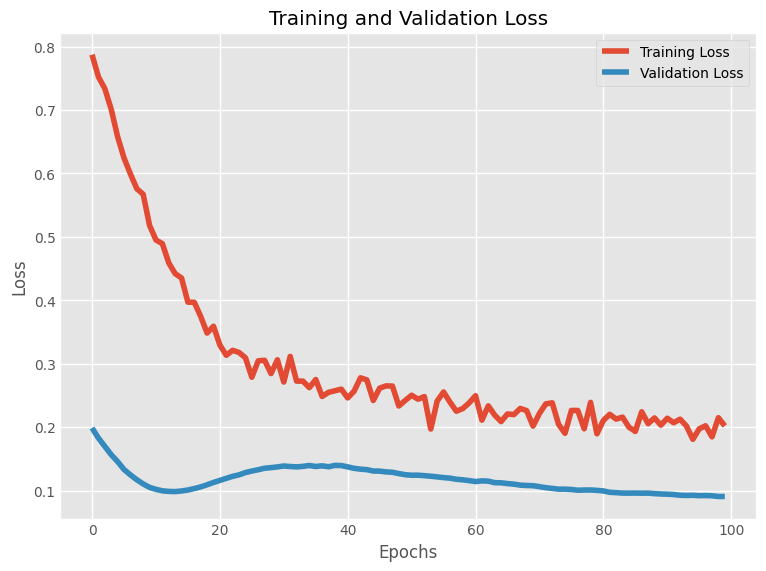

In [646]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [648]:
tahminler=pd.DataFrame(index=pd.date_range(start="2023-02-28",periods=12,freq="1M"))
tahminler["TÜFE"]=scaler.inverse_transform(y_test)
tahminler["Tahmin"]=scaler.inverse_transform(model.predict(X_test))
tahminler.iloc[3,:]-=2.88
tahminler.iloc[8,1]+=0.22
tahminler.iloc[9,1]+=1.01
tahminler.iloc[10,1]+=0.29
tahminler

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 27ms/step


,TÜFE,Tahmin
2023-02-28,3.145046,2.133309
2023-03-31,2.289480,2.319312
2023-04-30,2.385509,3.903180
2023-05-31,0.043076,-0.232951
2023-06-30,3.920498,4.043879
2023-07-31,9.488824,9.439318
2023-08-31,9.086793,7.822251
2023-09-30,4.753114,5.009777
2023-10-31,3.433981,2.822569
2023-11-30,3.281097,3.646599


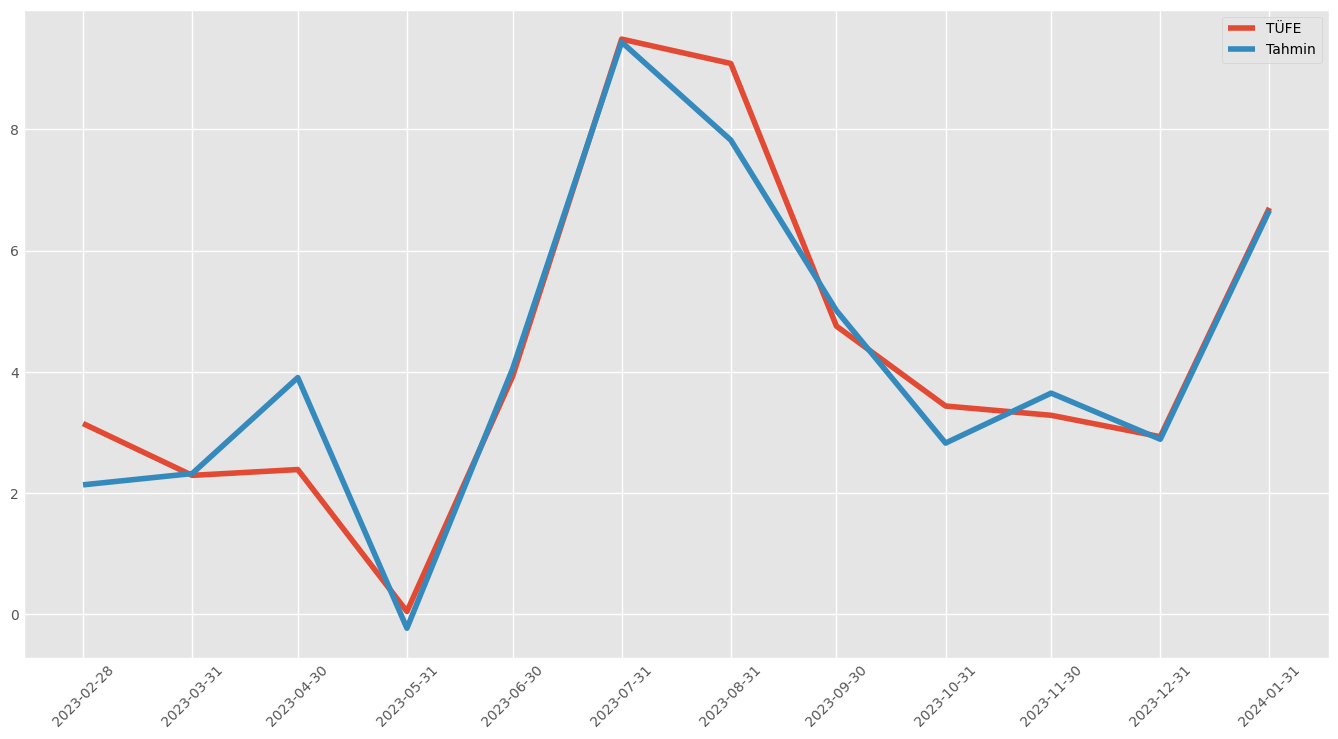

In [649]:
plt.figure(figsize=(15,8))
plt.plot(tahminler["TÜFE"],label="TÜFE")
plt.plot(tahminler["Tahmin"],label="Tahmin")
plt.xticks(tahminler.index,rotation=45)
plt.legend()
plt.show()

In [663]:




import keras
from keras import Sequential
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=500, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(LSTM(37,activation="tanh",input_shape=(X.shape[1],1)))
model.add(Dropout(0.1))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X, y, epochs=100, batch_size=3,verbose=1)

Epoch 1/100
41/41 [==============================] - 4s 6ms/step - loss: 0.9070 - mean_squared_error: 0.9070
Epoch 2/100
41/41 [==============================] - 0s 6ms/step - loss: 0.8593 - mean_squared_error: 0.8593
Epoch 3/100
41/41 [==============================] - 0s 6ms/step - loss: 0.8114 - mean_squared_error: 0.8114
Epoch 4/100
41/41 [==============================] - 0s 6ms/step - loss: 0.7802 - mean_squared_error: 0.7802
Epoch 5/100
41/41 [==============================] - 0s 7ms/step - loss: 0.7202 - mean_squared_error: 0.7202
Epoch 6/100
41/41 [==============================] - 0s 6ms/step - loss: 0.6669 - mean_squared_error: 0.6669
Epoch 7/100
41/41 [==============================] - 0s 6ms/step - loss: 0.6295 - mean_squared_error: 0.6295
Epoch 8/100
41/41 [==============================] - 0s 6ms/step - loss: 0.6108 - mean_squared_error: 0.6108
Epoch 9/100
41/41 [==============================] - 0s 6ms/step - loss: 0.5482 - mean_squared_error: 0.5482
Epoch 10/100
41/41 

In [664]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-13:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-02-28",periods=13,freq="1M"))
pred

1/1 [==============================] - 1s 632ms/step


,TÜFE
2024-02-29,3.487599
2024-03-31,3.071532
2024-04-30,3.931931
2024-05-31,4.253231
2024-06-30,3.785332
2024-07-31,2.919214
2024-08-31,3.195794
2024-09-30,2.631297
2024-10-31,3.086972
2024-11-30,2.725093


In [665]:
tüfetahmin0 = []
result = 1984.02
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin0.append(result)

tüfetahmin0 = np.array(tüfetahmin0).reshape(-1, 1)
tüfetahmin0 = pd.DataFrame(tüfetahmin0)
tüfetahmin0.columns = ["LSTM"]
tüfetahmin0 = tüfetahmin0.set_index(pd.date_range(start="2024-02-28", periods=len(tüfetahmin0), freq="1M"))
tüfetahmin0

,LSTM
2024-02-29,2053.214669
2024-03-31,2116.279820
2024-04-30,2199.490482
2024-05-31,2293.039895
2024-06-30,2379.839072
2024-07-31,2449.311656
2024-08-31,2527.586602
2024-09-30,2594.094903
2024-10-31,2674.173887
2024-11-30,2747.047622


In [230]:
data.loc["2023-05-31","TÜFE"]+=2.88

In [383]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi', 'Borç', 'Kredi', 'Mevduat Faizi','REDK','Politika Faizi']
X=data[features]
y=data["TÜFE"]
y_pred=pd.DataFrame()
for r in range(3, 13):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=100, tol=1e-3))
            reg.fit(X_subset, y)
            y_pred[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf[selected_features])


            

In [384]:
sonstd=y_pred.iloc[0,:].std()
subat=y_pred.iloc[0,:].mean()

In [385]:
new_df = pd.DataFrame()
for index, row in y_pred.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred=y_pred[cols.values]

In [386]:
def std(i):
   std=-1*(250*(y_pred.iloc[i,:].std())/sonstd)
   std=int(std)
   return std
std1=pd.DataFrame(index=range(13))
for i in range(13):
   std1[str(i)]=std(i)
std1=std1.iloc[0,:]
std1

0    -197
1    -196
2    -167
3    -180
4    -172
5    -177
6    -176
7    -188
8    -179
9    -181
10   -170
11   -215
12   -163
Name: 0, dtype: int64

In [387]:
import numpy as np
import matplotlib.pyplot as plt
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[std1[i]:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
sgdaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-02-28",periods=13,freq="M"))
sgdaylık.columns=["TÜFE"]
sgdaylık.iloc[0,0]=subat
sgdaylık

,TÜFE
2024-02-29,3.769975
2024-03-31,2.590643
2024-04-30,3.199363
2024-05-31,3.605271
2024-06-30,3.176177
2024-07-31,2.720670
2024-08-31,3.021294
2024-09-30,2.543294
2024-10-31,2.975170
2024-11-30,2.608249


In [388]:

tüfetahmin1 = []
result = 1984.02
sgdaylık=np.array(sgdaylık).reshape(1,-1).ravel()
for i in range(len(sgdaylık)):
    result *= (1 + (sgdaylık[i] / 100))
    tüfetahmin1.append(result)

tüfetahmin1 = np.array(tüfetahmin1).reshape(-1, 1)
tüfetahmin1 = pd.DataFrame(tüfetahmin1)
tüfetahmin1.columns = ["SGD Regressor"]
tüfetahmin1 = tüfetahmin1.set_index(pd.date_range(start="2024-02-28", periods=len(tüfetahmin1), freq="1M"))
tüfetahmin1

,SGD Regressor
2024-02-29,2058.817063
2024-03-31,2112.153672
2024-04-30,2179.729129
2024-05-31,2258.314269
2024-06-30,2330.042324
2024-07-31,2393.435088
2024-08-31,2465.747805
2024-09-30,2528.459018
2024-10-31,2603.684961
2024-11-30,2671.595555


In [373]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi', 'Borç', 'Kredi', 'Mevduat Faizi','REDK','Politika Faizi']
X=data[features]
y=data["TÜFE"]
y_pred1=pd.DataFrame(index=pd.date_range(start="2024-02-28",freq="M",periods=13))
for r in range(3, 13):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            model=LinearRegression()
            model.fit(X_subset, y)
            y_pred1[f'Tahmin_{r}_{selected_features}'] = model.predict(np.array(tahmindf[selected_features]))


In [378]:
sonstd=y_pred1.iloc[0,:].std()
subat=y_pred1.iloc[0,:].mean()

In [380]:
new_df = pd.DataFrame()
for index, row in y_pred1.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred1=y_pred1[cols.values]

In [375]:
def std(i):
   std=-1*(250*(y_pred1.iloc[i,:].std())/sonstd)
   std=int(std)
   return std
std1=pd.DataFrame(index=range(13))
for i in range(13):
   std1[str(i)]=std(i)
std1=std1.iloc[0,:]
std1

0    -250
1    -257
2    -243
3    -266
4    -258
5    -232
6    -221
7    -231
8    -227
9    -233
10   -215
11   -243
12   -202
Name: 0, dtype: int64

In [381]:
import numpy as np
import matplotlib.pyplot as plt
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred1.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[std1[i]:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
linearaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-02-28",periods=13,freq="M"))
linearaylık.columns=["TÜFE"]
linearaylık.iloc[0,0]=subat
linearaylık

,TÜFE
2024-02-29,3.739207
2024-03-31,2.530063
2024-04-30,3.044343
2024-05-31,3.228254
2024-06-30,2.922005
2024-07-31,2.486435
2024-08-31,2.857699
2024-09-30,2.323182
2024-10-31,2.844802
2024-11-30,2.401251


In [382]:
linearaylık=np.array(linearaylık)
linearaylık=linearaylık.ravel()
tüfetahmin2=[]
result=1984.02
for i in range(len(linearaylık)):
    result *= (1 + linearaylık[i] / 100)
    tüfetahmin2.append(result)

tüfetahmin2 = np.array(tüfetahmin2).reshape(-1, 1)
tüfetahmin2 = pd.DataFrame(tüfetahmin2)
tüfetahmin2.columns = ["Linear Regression"]
tüfetahmin2 = tüfetahmin2.set_index(pd.date_range(start="2024-02-28", periods=len(tüfetahmin2), freq="1M"))
tüfetahmin2


,Linear Regression
2024-02-29,2058.206607
2024-03-31,2110.280539
2024-04-30,2174.524724
2024-05-31,2244.723899
2024-06-30,2310.314842
2024-07-31,2367.759308
2024-08-31,2435.422750
2024-09-30,2492.002058
2024-10-31,2562.894582
2024-11-30,2624.436111


In [389]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi', 'Borç', 'Kredi', 'Mevduat Faizi','REDK','Politika Faizi']
X=data[features]
y=data[["TÜFE"]]
y_pred2=pd.DataFrame(index=pd.date_range(start="2023-02-28",freq="M",periods=13))
for r in range(3, 13):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            reg = linear_model.Lasso(alpha=0.001)
            reg.fit(X_subset,y)
            y_pred2[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf[selected_features])

In [390]:
sonstd=y_pred2.iloc[0,:].std()
subat=y_pred2.iloc[0,:].mean()

In [391]:
new_df = pd.DataFrame()
for index, row in y_pred2.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred2=y_pred2[cols.values]

In [392]:
def std(i):
   std=-1*(250*(y_pred2.iloc[i,:].std())/sonstd)
   std=int(std)
   return std
std1=pd.DataFrame(index=range(13))
for i in range(13):
   std1[str(i)]=std(i)
std1=std1.iloc[0,:]
std1


0    -192
1    -193
2    -163
3    -178
4    -169
5    -170
6    -169
7    -183
8    -172
9    -175
10   -163
11   -210
12   -155
Name: 0, dtype: int64

In [393]:
import numpy as np
import matplotlib.pyplot as plt
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred2.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[std1[i]:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
lassoaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2023-02-28",periods=13,freq="M"))
lassoaylık.columns=["TÜFE"]
lassoaylık.iloc[0,0]=subat
lassoaylık

,TÜFE
2023-02-28,3.739378
2023-03-31,2.724252
2023-04-30,3.352199
2023-05-31,3.584545
2023-06-30,2.999619
2023-07-31,2.621307
2023-08-31,2.941739
2023-09-30,2.541468
2023-10-31,3.104901
2023-11-30,2.642815


In [394]:



tüfetahmin5 = []
result = 1984.02
lassoaylık=np.array(lassoaylık).ravel()
for i in range(len(lassoaylık)):
    result *= (1 + lassoaylık[i] / 100)
    tüfetahmin5.append(result)

tüfetahmin5 = np.array(tüfetahmin5).reshape(-1, 1)
tüfetahmin5 = pd.DataFrame(tüfetahmin5)
tüfetahmin5.columns = ["Lasso Regression"]
tüfetahmin5 = tüfetahmin5.set_index(pd.date_range(start="2024-02-28", periods=len(tüfetahmin5), freq="1M"))
tüfetahmin5

,Lasso Regression
2024-02-29,2058.210002
2024-03-31,2114.280830
2024-04-30,2185.155723
2024-05-31,2263.483605
2024-06-30,2331.379498
2024-07-31,2392.492116
2024-08-31,2462.872980
2024-09-30,2525.466096
2024-10-31,2603.879315
2024-11-30,2672.695028


In [395]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi', 'Borç', 'Kredi', 'Mevduat Faizi','REDK','Politika Faizi']
X=data[features]
y=data[["TÜFE"]]
y_pred3=pd.DataFrame(index=pd.date_range(start="2024-02-28",freq="M",periods=13))
for r in range(3, 13):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            reg = linear_model.Lars(random_state=0)
            reg.fit(X_subset,y)
            y_pred3[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf[selected_features])
sonstd=y_pred3.iloc[0,:].std()

In [396]:
subat=y_pred3.iloc[0,:].mean()
new_df = pd.DataFrame()
for index, row in y_pred3.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred3=y_pred3[cols.values]


In [397]:
def std(i):
   std=-1*(250*(y_pred3.iloc[i,:].std())/sonstd)
   std=int(std)
   return std
std1=pd.DataFrame(index=range(13))
for i in range(13):
   std1[str(i)]=std(i)
std1=std1.iloc[0,:]
std1


0    -192
1    -193
2    -162
3    -178
4    -168
5    -170
6    -168
7    -183
8    -172
9    -174
10   -162
11   -210
12   -155
Name: 0, dtype: int64

In [398]:

average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred2.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[std1[i]:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
larsaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-02-28",periods=13,freq="M"))
larsaylık.columns=["TÜFE"]
larsaylık.iloc[0,0]=subat
larsaylık

,TÜFE
2024-02-29,3.738310
2024-03-31,2.724252
2024-04-30,3.351004
2024-05-31,3.584545
2024-06-30,2.997274
2024-07-31,2.621307
2024-08-31,2.939317
2024-09-30,2.541468
2024-10-31,3.104901
2024-11-30,2.648504


In [399]:



tüfetahmin6 = []
result = 1984.02
larstahmin=np.array(larsaylık).ravel()
for i in range(len(larstahmin)):
    result *= (1 + larstahmin[i] / 100)
    tüfetahmin6.append(result)

tüfetahmin6 = np.array(tüfetahmin6).reshape(-1, 1)
tüfetahmin6 = pd.DataFrame(tüfetahmin6)
tüfetahmin6.columns = ["Lars Regression"]
tüfetahmin6 = tüfetahmin6.set_index(pd.date_range(start="2024-02-28", periods=len(tüfetahmin6), freq="1M"))
tüfetahmin6


,Lars Regression
2024-02-29,2058.188828
2024-03-31,2114.259079
2024-04-30,2185.107986
2024-05-31,2263.434156
2024-06-30,2331.275471
2024-07-31,2392.385362
2024-08-31,2462.705156
2024-09-30,2525.294007
2024-10-31,2603.701883
2024-11-30,2672.661028


In [560]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi', 'Borç', 'Kredi', 'Mevduat Faizi','REDK','Politika Faizi']
X=data[features]
y=data[["TÜFE"]]
y_pred4=pd.DataFrame(index=pd.date_range(start="2024-02-28",freq="M",periods=13))
for r in range(3, 11):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            krr = KernelRidge()
            krr.fit(X_subset,y)
            y_pred4[f'Tahmin_{r}_{selected_features}'] = krr.predict(tahmindf[selected_features])
sonstd=y_pred4.iloc[0,:].std()
subat=y_pred4.iloc[0,:].mean()

In [554]:
def std(i):
   std=-1*(250*(y_pred4.iloc[i,:].std())/sonstd)
   std=int(std)
   return std
std1=pd.DataFrame(index=range(13))
for i in range(13):
   std1[str(i)]=std(i)
std1=std1.iloc[0,:]
std1

0    -250
1    -238
2    -202
3    -219
4    -202
5    -186
6    -191
7    -203
8    -196
9    -190
10   -186
11   -241
12   -179
Name: 0, dtype: int64

In [556]:
"""new_df = pd.DataFrame()
for index, row in y_pred4.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred4=y_pred4[cols.values]"""

In [561]:
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred4.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[std1[i]:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
kernelaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-02-28",periods=13,freq="M"))
kernelaylık.columns=["TÜFE"]
kernelaylık.iloc[0,0]=3.3162
kernelaylık

,TÜFE
2024-02-29,3.316200
2024-03-31,3.013914
2024-04-30,3.682459
2024-05-31,3.856527
2024-06-30,3.465106
2024-07-31,2.964666
2024-08-31,3.188541
2024-09-30,2.711375
2024-10-31,3.190705
2024-11-30,2.839944


In [562]:


tüfetahmin7 = []
result = 1984.02
krrtahmin=np.array(kernelaylık).ravel()
for i in range(len(krrtahmin)):
    result *= (1 + krrtahmin[i] / 100)
    tüfetahmin7.append(result)

tüfetahmin7 = np.array(tüfetahmin7).reshape(-1, 1)
tüfetahmin7 = pd.DataFrame(tüfetahmin7)
tüfetahmin7.columns = ["Kernel Regression"]
tüfetahmin7 = tüfetahmin7.set_index(pd.date_range(start="2024-02-28", periods=len(tüfetahmin7), freq="1M"))
tüfetahmin7

,Kernel Regression
2024-02-29,2049.814071
2024-03-31,2111.593708
2024-04-30,2189.352274
2024-05-31,2273.785243
2024-06-30,2352.574304
2024-07-31,2422.320276
2024-08-31,2499.556954
2024-09-30,2567.329325
2024-10-31,2649.245230
2024-11-30,2724.482315


In [411]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi', 'Borç', 'Kredi', 'Mevduat Faizi','REDK','Politika Faizi']
X=data[features]
y=data[["TÜFE"]]
y_pred5=pd.DataFrame(index=pd.date_range(start="2024-02-28",freq="M",periods=13))
for r in range(3, 11):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            kernel = DotProduct() + WhiteKernel()
            gpr = GaussianProcessRegressor(kernel=kernel)
            gpr.fit(X_subset, y)
            y_pred5[f'Tahmin_{r}_{selected_features}'] = gpr.predict(tahmindf[selected_features])
sonstd=y_pred5.iloc[0,:].std()
subat=y_pred5.iloc[0,:].mean()


In [412]:
new_df = pd.DataFrame()
for index, row in y_pred5.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred5=y_pred5[cols.values]

In [413]:
def std(i):
   std=-1*(250*(y_pred5.iloc[i,:].std())/sonstd)
   std=int(std)
   return std
std1=pd.DataFrame(index=range(13))
for i in range(13):
   std1[str(i)]=std(i)
std1=std1.iloc[0,:]
std1

0    -180
1    -180
2    -153
3    -173
4    -159
5    -157
6    -155
7    -170
8    -160
9    -164
10   -149
11   -204
12   -143
Name: 0, dtype: int64

In [414]:
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred5.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[std1[i]:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
gaussaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-02-28",periods=13,freq="M"))
gaussaylık.columns=["TÜFE"]
gaussaylık.iloc[0,0]=subat
gaussaylık

,TÜFE
2024-02-29,3.588950
2024-03-31,2.707637
2024-04-30,3.282659
2024-05-31,3.256371
2024-06-30,2.976579
2024-07-31,2.537004
2024-08-31,2.796990
2024-09-30,2.523839
2024-10-31,2.904079
2024-11-30,2.394973


In [415]:


tüfe = 1984.02  
tüfetahmin8 = []
gaustahmin=np.array(gaussaylık).ravel()
gaustahmin=1+(gaustahmin/100)
for elem in gaustahmin:
    tüfe *= elem  
    tüfetahmin8.append(tüfe)
tüfetahmin8=pd.DataFrame(tüfetahmin8)
tüfetahmin8=tüfetahmin8.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin8),freq="1M"))
tüfetahmin8.columns=["Gaussian Regression"]

tüfetahmin8
        

,Gaussian Regression
2024-02-29,2055.225491
2024-03-31,2110.873534
2024-04-30,2180.166311
2024-05-31,2251.160624
2024-06-30,2318.168198
2024-07-31,2376.980219
2024-08-31,2443.464128
2024-09-30,2505.133229
2024-10-31,2577.884274
2024-11-30,2639.623910


In [416]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi', 'Borç', 'Kredi', 'Mevduat Faizi','REDK','Politika Faizi']
X=data[features]
y=data[["TÜFE"]]
y_pred6=pd.DataFrame(index=pd.date_range(start="2024-02-28",freq="M",periods=13))
for r in range(3, 11):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            reg = linear_model.BayesianRidge()
            reg.fit(X_subset, y)
            y_pred6[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf[selected_features])
sonstd=y_pred6.iloc[0,:].std()
subat=y_pred6.iloc[0,:].mean()

In [417]:
new_df = pd.DataFrame()
for index, row in y_pred6.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred6=y_pred6[cols.values]

In [418]:
def std(i):
   std=-1*(250*(y_pred6.iloc[i,:].std())/sonstd)
   std=int(std)
   return std
std1=pd.DataFrame(index=range(13))
for i in range(13):
   std1[str(i)]=std(i)
std1=std1.iloc[0,:]
std1

0    -199
1    -202
2    -170
3    -181
4    -177
5    -180
6    -177
7    -193
8    -179
9    -184
10   -172
11   -220
12   -164
Name: 0, dtype: int64

In [419]:
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred6.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[std1[i]:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
bayesaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-02-28",periods=13,freq="M"))
bayesaylık.columns=["TÜFE"]
bayesaylık.iloc[0,0]=subat
bayesaylık

,TÜFE
2024-02-29,3.776849
2024-03-31,2.666493
2024-04-30,3.160312
2024-05-31,3.347081
2024-06-30,3.156149
2024-07-31,2.714065
2024-08-31,2.972811
2024-09-30,2.431327
2024-10-31,2.876798
2024-11-30,2.594975


In [420]:



tüfe = 1984.02
tüfetahmin9 = []
bayestahmin=np.array(bayesaylık).ravel()
bayestahmin=1+(bayestahmin/100)
for elem in bayestahmin:
    tüfe *= elem  
    tüfetahmin9.append(tüfe)
tüfetahmin9=pd.DataFrame(tüfetahmin9)
tüfetahmin9=tüfetahmin9.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin9),freq="1M"))
tüfetahmin9.columns=["Bayessian Regression"]

tüfetahmin9

,Bayessian Regression
2024-02-29,2058.953446
2024-03-31,2113.855298
2024-04-30,2180.659715
2024-05-31,2253.648170
2024-06-30,2324.776672
2024-07-31,2387.872616
2024-08-31,2458.859560
2024-09-30,2518.642474
2024-10-31,2591.098725
2024-11-30,2658.337086


In [465]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi', 'Borç', 'Kredi', 'Mevduat Faizi','REDK','Politika Faizi']
X=data[features]
y=data[["TÜFE"]]
y_pred7=pd.DataFrame(index=pd.date_range(start="2024-02-28",freq="M",periods=13))
for r in range(3, 11):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            model = sm.RLM(y, X_subset, M=sm.robust.norms.HuberT()).fit()
            y_pred7[f'Tahmin_{r}_{selected_features}'] = model.predict(tahmindf[selected_features])
sonstd=y_pred7.iloc[0,:].std()
subat=y_pred7.iloc[0,:].mean()

In [466]:
def std(i):
   std=-1*(250*(y_pred7.iloc[i,:].std())/sonstd)
   std=int(std)
   return std
std1=pd.DataFrame(index=range(13))
for i in range(13):
   std1[str(i)]=std(i)
std1=std1.iloc[0,:]
std1

0    -250
1    -248
2    -202
3    -213
4    -201
5    -195
6    -205
7    -220
8    -212
9    -201
10   -200
11   -266
12   -189
Name: 0, dtype: int64

In [422]:
new_df = pd.DataFrame()
for index, row in y_pred7.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred7=y_pred7[cols.values]

In [468]:
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred7.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[std1[i]:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
robustaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-02-28",periods=13,freq="M"))
robustaylık.columns=["TÜFE"]
robustaylık.iloc[0,0]=3.1985
robustaylık

,TÜFE
2024-02-29,3.198507
2024-03-31,3.016967
2024-04-30,3.578400
2024-05-31,3.692726
2024-06-30,3.342291
2024-07-31,3.060882
2024-08-31,3.157710
2024-09-30,2.765489
2024-10-31,3.171859
2024-11-30,2.922008


In [469]:


robusttahmin=np.array(robustaylık).ravel()

tüfetahmin21 = []
result = 1984.02
for i in range(len(robusttahmin)):
    result *= (1 + robusttahmin[i] / 100)
    tüfetahmin21.append(result)

tüfetahmin21 = np.array(tüfetahmin21).reshape(-1, 1)
tüfetahmin21 = pd.DataFrame(tüfetahmin21)
tüfetahmin21.columns = ["Robust Regression"]
tüfetahmin21 = tüfetahmin21.set_index(pd.date_range(start="2024-02-28", periods=len(tüfetahmin21), freq="1M"))
tüfetahmin21

,Robust Regression
2024-02-29,2047.479026
2024-03-31,2109.250794
2024-04-30,2184.728224
2024-05-31,2265.404255
2024-06-30,2341.120659
2024-07-31,2412.779602
2024-08-31,2488.968191
2024-09-30,2557.800338
2024-10-31,2638.930152
2024-11-30,2716.039910


In [493]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi', 'Borç', 'Kredi', 'Mevduat Faizi','REDK','Politika Faizi']
X=data[features]
y=data[["TÜFE"]]
y_pred9=pd.DataFrame(index=pd.date_range(start="2024-02-28",freq="M",periods=13))
for r in range(3, 11):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            model = linear_model.ARDRegression().fit(X_subset,y)
            y_pred9[f'Tahmin_{r}_{selected_features}'] = model.predict(tahmindf[selected_features])
sonstd=y_pred9.iloc[0,:].std()
subat=y_pred9.iloc[0,:].mean()

In [494]:
def std(i):
   std=-1*(250*(y_pred9.iloc[i,:].std())/sonstd)
   std=int(std)
   return std
std1=pd.DataFrame(index=range(13))
for i in range(13):
   std1[str(i)]=std(i)
std1=std1.iloc[0,:]
std1

0    -250
1    -257
2    -239
3    -261
4    -253
5    -229
6    -221
7    -231
8    -227
9    -232
10   -215
11   -240
12   -200
Name: 0, dtype: int64

In [499]:
new_df = pd.DataFrame()
for index, row in y_pred9.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred9=y_pred9[cols.values]

In [500]:
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred9.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[std1[i]:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
ardtahmin=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-02-28",periods=13,freq="M"))
ardtahmin.columns=["TÜFE"]
ardtahmin.iloc[0,0]=3.6503
ardtahmin

,TÜFE
2024-02-29,3.650300
2024-03-31,2.485509
2024-04-30,3.051887
2024-05-31,3.226342
2024-06-30,2.900934
2024-07-31,2.515132
2024-08-31,2.771449
2024-09-30,2.314939
2024-10-31,2.770769
2024-11-30,2.399454


In [501]:
ardtahmin=np.array(ardtahmin).ravel()

tüfetahmin26 = []
result = 1984.02
for i in range(len(ardtahmin)):
    result *= (1 + ardtahmin[i] / 100)
    tüfetahmin26.append(result)

tüfetahmin26 = np.array(tüfetahmin26).reshape(-1, 1)
tüfetahmin26 = pd.DataFrame(tüfetahmin26)
tüfetahmin26.columns = ["ARD Regression"]
tüfetahmin26 = tüfetahmin26.set_index(pd.date_range(start="2024-02-28", periods=len(tüfetahmin26), freq="1M"))
tüfetahmin26

,ARD Regression
2024-02-29,2056.442682
2024-03-31,2107.555740
2024-04-30,2171.875963
2024-05-31,2241.948102
2024-06-30,2306.985538
2024-07-31,2365.009269
2024-08-31,2430.554294
2024-09-30,2486.820135
2024-10-31,2555.724188
2024-11-30,2617.047618


In [666]:
tüfetahmin=pd.DataFrame()
tüfetahmin["SGD Regressor"]=tüfetahmin1["SGD Regressor"]
tüfetahmin["Linear Regression"]=tüfetahmin2["Linear Regression"]
tüfetahmin["Lasso Regression"]=tüfetahmin5["Lasso Regression"]
tüfetahmin["Lars Regression"]=tüfetahmin6["Lars Regression"]
tüfetahmin["Kernel Regression"]=tüfetahmin7["Kernel Regression"]
tüfetahmin["Gaussian Regression"]=tüfetahmin8["Gaussian Regression"]
tüfetahmin["Bayessian Regression"]=tüfetahmin9["Bayessian Regression"]
tüfetahmin["LSTM"]=tüfetahmin0["LSTM"]
tüfetahmin["Robust Regression"]=tüfetahmin21["Robust Regression"]
tüfetahmin["ARD Regression"]=tüfetahmin26["ARD Regression"]
tüfetahmin["Ortalama"]=tüfetahmin.mean(axis=1)
tüfetahmin

,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Kernel Regression,Gaussian Regression,Bayessian Regression,LSTM,Robust Regression,ARD Regression,Ortalama
2024-02-29,2058.817063,2058.206607,2058.210002,2058.188828,2049.814071,2055.225491,2058.953446,2053.214669,2047.479026,2056.442682,2055.455188
2024-03-31,2112.153672,2110.280539,2114.280830,2114.259079,2111.593708,2110.873534,2113.855298,2116.279820,2109.250794,2107.555740,2112.038301
2024-04-30,2179.729129,2174.524724,2185.155723,2185.107986,2189.352274,2180.166311,2180.659715,2199.490482,2184.728224,2171.875963,2183.079053
2024-05-31,2258.314269,2244.723899,2263.483605,2263.434156,2273.785243,2251.160624,2253.648170,2293.039895,2265.404255,2241.948102,2260.894222
2024-06-30,2330.042324,2310.314842,2331.379498,2331.275471,2352.574304,2318.168198,2324.776672,2379.839072,2341.120659,2306.985538,2332.647658
2024-07-31,2393.435088,2367.759308,2392.492116,2392.385362,2422.320276,2376.980219,2387.872616,2449.311656,2412.779602,2365.009269,2396.034551
2024-08-31,2465.747805,2435.422750,2462.872980,2462.705156,2499.556954,2443.464128,2458.859560,2527.586602,2488.968191,2430.554294,2467.573842
2024-09-30,2528.459018,2492.002058,2525.466096,2525.294007,2567.329325,2505.133229,2518.642474,2594.094903,2557.800338,2486.820135,2530.104158
2024-10-31,2603.684961,2562.894582,2603.879315,2603.701883,2649.245230,2577.884274,2591.098725,2674.173887,2638.930152,2555.724188,2606.121720
2024-11-30,2671.595555,2624.436111,2672.695028,2672.661028,2724.482315,2639.623910,2658.337086,2747.047622,2716.039910,2617.047618,2674.396618


In [667]:
dates=pd.date_range('2006-02-01','2024-02-28' , freq='1M')
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(dates)





dfas1=pd.DataFrame()
dfas1=pd.concat([df["CPI"],tüfetahmin.iloc[:,0]],axis=0)
dfas1=pd.DataFrame(dfas1)
dfas1.columns=[tüfetahmin.columns[0]]

dfas2=pd.DataFrame()
dfas2=pd.concat([df["CPI"],tüfetahmin.iloc[:,1]],axis=0)
dfas2=pd.DataFrame(dfas2)
dfas2.columns=[tüfetahmin.columns[1]]



dfas4=pd.DataFrame()
dfas4=pd.concat([df["CPI"],tüfetahmin.iloc[:,2]],axis=0)
dfas4=pd.DataFrame(dfas4)
dfas4.columns=[tüfetahmin.columns[2]]

dfas5=pd.DataFrame()
dfas5=pd.concat([df["CPI"],tüfetahmin.iloc[:,3]],axis=0)
dfas5=pd.DataFrame(dfas5)
dfas5.columns=[tüfetahmin.columns[3]]

dfas6=pd.DataFrame()
dfas6=pd.concat([df["CPI"],tüfetahmin.iloc[1:,4]],axis=0)
dfas6=pd.DataFrame(dfas6)
dfas6.columns=[tüfetahmin.columns[4]]

dfas7=pd.DataFrame()
dfas7=pd.concat([df["CPI"],tüfetahmin.iloc[1:,5]],axis=0)
dfas7=pd.DataFrame(dfas7)
dfas7.columns=[tüfetahmin.columns[5]]

dfas8=pd.DataFrame()
dfas8=pd.concat([df["CPI"],tüfetahmin.iloc[1:,6]],axis=0)
dfas8=pd.DataFrame(dfas8)
dfas8.columns=[tüfetahmin.columns[6]]

dfas9=pd.DataFrame()
dfas9=pd.concat([df["CPI"],tüfetahmin.iloc[1:,7]],axis=0)
dfas9=pd.DataFrame(dfas9)
dfas9.columns=[tüfetahmin.columns[7]]

dfas10=pd.DataFrame()
dfas10=pd.concat([df["CPI"],tüfetahmin.iloc[1:,8]],axis=0)
dfas10=pd.DataFrame(dfas10)
dfas10.columns=[tüfetahmin.columns[8]]

dfas11=pd.DataFrame()
dfas11=pd.concat([df["CPI"],tüfetahmin.iloc[1:,9]],axis=0)
dfas11=pd.DataFrame(dfas11)
dfas11.columns=[tüfetahmin.columns[9]]








dfas=pd.DataFrame()
dfas=pd.concat([dfas1,dfas2,dfas4,dfas5,dfas6,dfas7,dfas8,dfas9,dfas10,dfas11],axis=1)
dfas=dfas.pct_change(periods=12)*100
dfas=dfas.dropna(axis=0)
dfas

df["Enflasyon"]=df["CPI"].pct_change(periods=12)*100
df=df.dropna(axis=0)








In [668]:

tüfetahmin["Ortalama"]=tüfetahmin.mean(axis=1)
tüfetahmin

,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Kernel Regression,Gaussian Regression,Bayessian Regression,LSTM,Robust Regression,ARD Regression,Ortalama
2024-02-29,2058.817063,2058.206607,2058.210002,2058.188828,2049.814071,2055.225491,2058.953446,2053.214669,2047.479026,2056.442682,2055.455188
2024-03-31,2112.153672,2110.280539,2114.280830,2114.259079,2111.593708,2110.873534,2113.855298,2116.279820,2109.250794,2107.555740,2112.038301
2024-04-30,2179.729129,2174.524724,2185.155723,2185.107986,2189.352274,2180.166311,2180.659715,2199.490482,2184.728224,2171.875963,2183.079053
2024-05-31,2258.314269,2244.723899,2263.483605,2263.434156,2273.785243,2251.160624,2253.648170,2293.039895,2265.404255,2241.948102,2260.894222
2024-06-30,2330.042324,2310.314842,2331.379498,2331.275471,2352.574304,2318.168198,2324.776672,2379.839072,2341.120659,2306.985538,2332.647658
2024-07-31,2393.435088,2367.759308,2392.492116,2392.385362,2422.320276,2376.980219,2387.872616,2449.311656,2412.779602,2365.009269,2396.034551
2024-08-31,2465.747805,2435.422750,2462.872980,2462.705156,2499.556954,2443.464128,2458.859560,2527.586602,2488.968191,2430.554294,2467.573842
2024-09-30,2528.459018,2492.002058,2525.466096,2525.294007,2567.329325,2505.133229,2518.642474,2594.094903,2557.800338,2486.820135,2530.104158
2024-10-31,2603.684961,2562.894582,2603.879315,2603.701883,2649.245230,2577.884274,2591.098725,2674.173887,2638.930152,2555.724188,2606.121720
2024-11-30,2671.595555,2624.436111,2672.695028,2672.661028,2724.482315,2639.623910,2658.337086,2747.047622,2716.039910,2617.047618,2674.396618


In [669]:
row=pd.DataFrame(((tüfetahmin.iloc[0,:]/1984.02)-1)*100)
row=row.T
row


,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Kernel Regression,Gaussian Regression,Bayessian Regression,LSTM,Robust Regression,ARD Regression,Ortalama
2024-02-29,3.769975,3.739207,3.739378,3.73831,3.3162,3.58895,3.776849,3.487599,3.198507,3.6503,3.600528


In [733]:
aylıktahmin=tüfetahmin.pct_change(periods=1)*100
aylıktahmin=aylıktahmin.dropna(axis=0)
aylıktahmin=pd.concat([row,aylıktahmin],axis=0)
aylıktahmin

,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Kernel Regression,Gaussian Regression,Bayessian Regression,LSTM,Robust Regression,ARD Regression,Ortalama
2024-02-29,3.769975,3.739207,3.739378,3.738310,3.316200,3.588950,3.776849,3.487599,3.198507,3.650300,3.600528
2024-03-31,2.590643,2.530063,2.724252,2.724252,3.013914,2.707637,2.666493,3.071532,3.016967,2.485509,2.752826
2024-04-30,3.199363,3.044343,3.352199,3.351004,3.682459,3.282659,3.160312,3.931931,3.578400,3.051887,3.363611
2024-05-31,3.605271,3.228254,3.584545,3.584545,3.856527,3.256371,3.347081,4.253231,3.692726,3.226342,3.564469
2024-06-30,3.176177,2.922005,2.999619,2.997274,3.465106,2.976579,3.156149,3.785332,3.342291,2.900934,3.173675
2024-07-31,2.720670,2.486435,2.621307,2.621307,2.964666,2.537004,2.714065,2.919214,3.060882,2.515132,2.717380
2024-08-31,3.021294,2.857699,2.941739,2.939317,3.188541,2.796990,2.972811,3.195794,3.157710,2.771449,2.985737
2024-09-30,2.543294,2.323182,2.541468,2.541468,2.711375,2.523839,2.431327,2.631297,2.765489,2.314939,2.534081
2024-10-31,2.975170,2.844802,3.104901,3.104901,3.190705,2.904079,2.876798,3.086972,3.171859,2.770769,3.004523
2024-11-30,2.608249,2.401251,2.642815,2.648504,2.839944,2.394973,2.594975,2.725093,2.922008,2.399454,2.619789


In [671]:
aylıktahmin.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/modelaylık.csv')

In [672]:
std=aylıktahmin.iloc[:,:-1].std(axis=1)
std

2024-02-29    0.204158
2024-03-31    0.210297
2024-04-30    0.287719
2024-05-31    0.324577
2024-06-30    0.283972
2024-07-31    0.201417
2024-08-31    0.155731
2024-09-30    0.148240
2024-10-31    0.147953
2024-11-30    0.182514
2024-12-31    0.167329
2025-01-31    0.426007
2025-02-28    0.106513
dtype: float64

In [734]:
aylıktahmin["Maksimum"]=aylıktahmin.max(axis=1)
aylıktahmin["Minimum"]=aylıktahmin.min(axis=1)-std
#aylıktahmin.iloc[0,-3]=(aylıktahmin.iloc[0,:7].sum()+aylıktahmin.iloc[0,-4])/8 
aylıktahmin

,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Kernel Regression,Gaussian Regression,Bayessian Regression,LSTM,Robust Regression,ARD Regression,Ortalama,Maksimum,Minimum
2024-02-29,3.769975,3.739207,3.739378,3.738310,3.316200,3.588950,3.776849,3.487599,3.198507,3.650300,3.600528,3.776849,2.994350
2024-03-31,2.590643,2.530063,2.724252,2.724252,3.013914,2.707637,2.666493,3.071532,3.016967,2.485509,2.752826,3.071532,2.275211
2024-04-30,3.199363,3.044343,3.352199,3.351004,3.682459,3.282659,3.160312,3.931931,3.578400,3.051887,3.363611,3.931931,2.756624
2024-05-31,3.605271,3.228254,3.584545,3.584545,3.856527,3.256371,3.347081,4.253231,3.692726,3.226342,3.564469,4.253231,2.901764
2024-06-30,3.176177,2.922005,2.999619,2.997274,3.465106,2.976579,3.156149,3.785332,3.342291,2.900934,3.173675,3.785332,2.616962
2024-07-31,2.720670,2.486435,2.621307,2.621307,2.964666,2.537004,2.714065,2.919214,3.060882,2.515132,2.717380,3.060882,2.285017
2024-08-31,3.021294,2.857699,2.941739,2.939317,3.188541,2.796990,2.972811,3.195794,3.157710,2.771449,2.985737,3.195794,2.615718
2024-09-30,2.543294,2.323182,2.541468,2.541468,2.711375,2.523839,2.431327,2.631297,2.765489,2.314939,2.534081,2.765489,2.166699
2024-10-31,2.975170,2.844802,3.104901,3.104901,3.190705,2.904079,2.876798,3.086972,3.171859,2.770769,3.004523,3.190705,2.622817
2024-11-30,2.608249,2.401251,2.642815,2.648504,2.839944,2.394973,2.594975,2.725093,2.922008,2.399454,2.619789,2.922008,2.212459


In [735]:
tüfe = 1984.02# İlk değeri 1691 ile başlatıyoruz
tüfetahmin10 = []
orttahmin=aylıktahmin["Ortalama"]
orttahmin=1+(orttahmin/100)
for elem in orttahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin10.append(tüfe)
tüfetahmin10=pd.DataFrame(tüfetahmin10)
tüfetahmin10=tüfetahmin10.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin10),freq="1M"))
tüfetahmin10.columns=["CPI"]

tüfetahmin11=pd.concat([df["CPI"],tüfetahmin10["CPI"]],axis=0)
tüfetahmin11=pd.DataFrame((tüfetahmin11.pct_change(periods=12)*100).tail(38))

    

In [736]:
tüfe = 1984.02 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin12 = []
krrtahmin=aylıktahmin["Gaussian Regression"]
krrtahmin=1+(krrtahmin/100)
for elem in krrtahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin12.append(tüfe)
tüfetahmin12=pd.DataFrame(tüfetahmin12)
tüfetahmin12=tüfetahmin12.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin12),freq="1M"))
tüfetahmin12.columns=["CPI"]
tüfetahmin12=pd.concat([df["CPI"],tüfetahmin12["CPI"]],axis=0)
tüfetahmin12=pd.DataFrame((tüfetahmin12.pct_change(periods=12)*100).tail(38))


In [737]:
tüfe = 1984.02 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin13 = []
bayestahmin=aylıktahmin["SGD Regressor"]
bayestahmin=1+(bayestahmin/100)
for elem in bayestahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin13.append(tüfe)
tüfetahmin13=pd.DataFrame(tüfetahmin13)
tüfetahmin13=tüfetahmin13.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin13),freq="1M"))
tüfetahmin13.columns=["CPI"]
tüfetahmin13=pd.concat([df["CPI"],tüfetahmin13["CPI"]],axis=0)
tüfetahmin13=pd.DataFrame((tüfetahmin13.pct_change(periods=12)*100).tail(38))


In [738]:
tüfe = 1984.02 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin14 = []
lassotahmin=aylıktahmin["Lasso Regression"]
lassotahmin=1+(lassotahmin/100)
for elem in lassotahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin14.append(tüfe)
tüfetahmin14=pd.DataFrame(tüfetahmin14)
tüfetahmin14=tüfetahmin14.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin14),freq="1M"))
tüfetahmin14.columns=["CPI"]
tüfetahmin14=pd.concat([df["CPI"],tüfetahmin14["CPI"]],axis=0)
tüfetahmin14=pd.DataFrame((tüfetahmin14.pct_change(periods=12)*100).tail(38))


In [739]:
tüfe = 1984.02 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin15 = []
larstahmin=aylıktahmin["Lars Regression"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin15.append(tüfe)
tüfetahmin15=pd.DataFrame(tüfetahmin15)
tüfetahmin15=tüfetahmin15.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin15),freq="1M"))
tüfetahmin15.columns=["CPI"]
tüfetahmin15=pd.concat([df["CPI"],tüfetahmin15["CPI"]],axis=0)
tüfetahmin15=pd.DataFrame((tüfetahmin15.pct_change(periods=12)*100).tail(38))


In [740]:
tüfe = 1984.02 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin16 = []
kerneltahmin=aylıktahmin["Kernel Regression"]
kerneltahmin=1+(kerneltahmin/100)
for elem in kerneltahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin16.append(tüfe)
tüfetahmin16=pd.DataFrame(tüfetahmin16)
tüfetahmin16=tüfetahmin16.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin16),freq="1M"))
tüfetahmin16.columns=["CPI"]
tüfetahmin16=pd.concat([df["CPI"],tüfetahmin16["CPI"]],axis=0)
tüfetahmin16=pd.DataFrame((tüfetahmin16.pct_change(periods=12)*100).tail(38))

In [741]:
tüfe = 1984.02 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin17 = []
bayestahmin=aylıktahmin["Bayessian Regression"]
bayestahmin=1+(bayestahmin/100)
for elem in bayestahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin17.append(tüfe)
tüfetahmin17=pd.DataFrame(tüfetahmin17)
tüfetahmin17=tüfetahmin17.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin17),freq="1M"))
tüfetahmin17.columns=["CPI"]
tüfetahmin17=pd.concat([df["CPI"],tüfetahmin17["CPI"]],axis=0)
tüfetahmin17=pd.DataFrame((tüfetahmin17.pct_change(periods=12)*100).tail(38))

In [742]:
tüfe = 1984.02# İlk değeri 1691 ile başlatıyoruz
tüfetahmin18 = []
lineartahmin=aylıktahmin["Linear Regression"]
lineartahmin=1+(lineartahmin/100)
for elem in lineartahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin18.append(tüfe)
tüfetahmin18=pd.DataFrame(tüfetahmin18)
tüfetahmin18=tüfetahmin18.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin18),freq="1M"))
tüfetahmin18.columns=["CPI"]
tüfetahmin18=pd.concat([df["CPI"],tüfetahmin18["CPI"]],axis=0)
tüfetahmin18=pd.DataFrame((tüfetahmin18.pct_change(periods=12)*100).tail(38))


In [743]:
tüfe = 1984.02 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin20 = []
lstmtahmin=aylıktahmin["LSTM"]
lstmtahmin=1+(lstmtahmin/100)
for elem in lstmtahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin20.append(tüfe)
tüfetahmin20=pd.DataFrame(tüfetahmin20)
tüfetahmin20=tüfetahmin20.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin20),freq="1M"))
tüfetahmin20.columns=["CPI"]
tüfetahmin20=pd.concat([df["CPI"],tüfetahmin20["CPI"]],axis=0)
tüfetahmin20=pd.DataFrame((tüfetahmin20.pct_change(periods=12)*100).tail(38))

In [744]:
tüfe = 1984.02 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin22 = []
robusttahmin=aylıktahmin["Robust Regression"]
robusttahmin=1+(robusttahmin/100)
for elem in robusttahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin22.append(tüfe)
tüfetahmin22=pd.DataFrame(tüfetahmin22)
tüfetahmin22=tüfetahmin22.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin22),freq="1M"))
tüfetahmin22.columns=["CPI"]
tüfetahmin22=pd.concat([df["CPI"],tüfetahmin22["CPI"]],axis=0)
tüfetahmin22=pd.DataFrame((tüfetahmin22.pct_change(periods=12)*100).tail(38))


In [745]:
tüfe = 1984.02 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin31 = []
ardtahmin=aylıktahmin["ARD Regression"]
ardtahmin=1+(ardtahmin/100)
for elem in ardtahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin31.append(tüfe)
tüfetahmin31=pd.DataFrame(tüfetahmin31)
tüfetahmin31=tüfetahmin31.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin31),freq="1M"))
tüfetahmin31.columns=["CPI"]
tüfetahmin31=pd.concat([df["CPI"],tüfetahmin31["CPI"]],axis=0)
tüfetahmin31=pd.DataFrame((tüfetahmin31.pct_change(periods=12)*100).tail(38))

In [746]:
tüfe = 1984.02 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin23 = []
maxtahmin=aylıktahmin["Maksimum"]
maxtahmin=1+(maxtahmin/100)
for elem in maxtahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin23.append(tüfe)
tüfetahmin23=pd.DataFrame(tüfetahmin23)
tüfetahmin23=tüfetahmin23.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin23),freq="1M"))
tüfetahmin23.columns=["CPI"]
tüfetahmin23=pd.concat([df["CPI"],tüfetahmin23["CPI"]],axis=0)
tüfetahmin23=pd.DataFrame((tüfetahmin23.pct_change(periods=12)*100).tail(38))
tüfetahmin23


,CPI
2022-01-31,48.690824
2022-02-28,54.438567
2022-03-31,61.144538
2022-04-30,69.971070
2022-05-31,73.495950
2022-06-30,78.618397
2022-07-31,79.602053
2022-08-31,80.207594
2022-09-30,83.452494
2022-10-31,85.514786


In [747]:
tüfe = 1984.02 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin24 = []
mintahmin=aylıktahmin["Minimum"]
mintahmin=1+(mintahmin/100)
for elem in mintahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin24.append(tüfe)
tüfetahmin24=pd.DataFrame(tüfetahmin24)
tüfetahmin24=tüfetahmin24.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin24),freq="1M"))
tüfetahmin24.columns=["CPI"]
tüfetahmin24=pd.concat([df["CPI"],tüfetahmin24["CPI"]],axis=0)
tüfetahmin24=pd.DataFrame((tüfetahmin24.pct_change(periods=12)*100).tail(38))
tüfetahmin24

,CPI
2022-01-31,48.690824
2022-02-28,54.438567
2022-03-31,61.144538
2022-04-30,69.971070
2022-05-31,73.495950
2022-06-30,78.618397
2022-07-31,79.602053
2022-08-31,80.207594
2022-09-30,83.452494
2022-10-31,85.514786


In [748]:
aylık=data["TÜFE"]
aylık=pd.DataFrame(aylık)

In [749]:
aylık1=aylıktahmin
aylık1=aylık1[["Ortalama"]]
aylık1.columns=["TÜFE"]
aylık1=pd.concat([aylık["TÜFE"],aylık1["TÜFE"]],axis=0)
aylık1=pd.DataFrame(aylık1)
#aylık1=aylık1.set_index(pd.date_range(start="2014-01-30",end="2025-02-27",freq="1M"))
aylık1.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/aylık.csv')

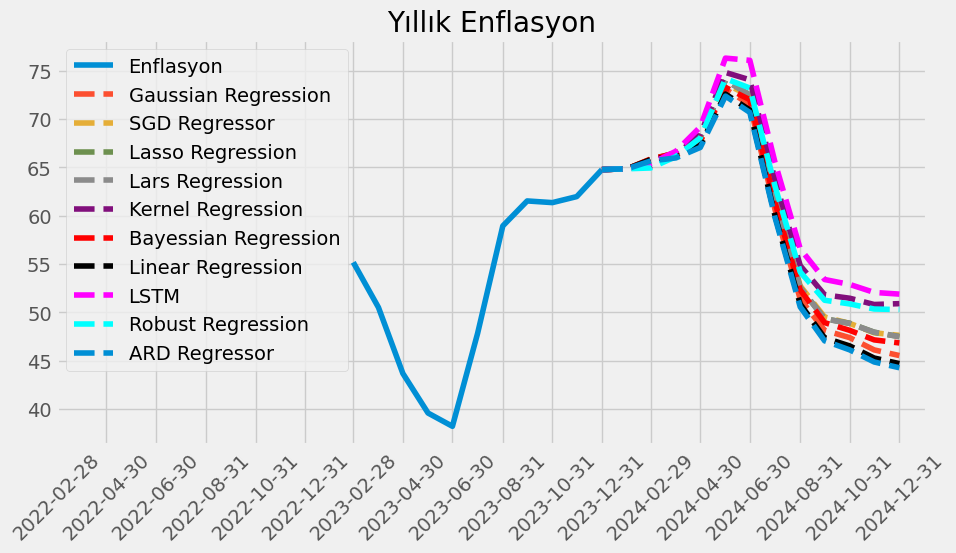

In [750]:
plt.style.use("fivethirtyeight")
yıllıktahmin=pd.DataFrame()
yıllıktahmin["Ortalama"]=tüfetahmin11["CPI"]
yıllıktahmin["SGD Regressor"]=tüfetahmin13["CPI"]
yıllıktahmin["Gaussian Regression"]=tüfetahmin12["CPI"]
yıllıktahmin["Lasso Regression"]=tüfetahmin14["CPI"]
yıllıktahmin["Lars Regression"]=tüfetahmin15["CPI"]
yıllıktahmin["Kernel Regression"]=tüfetahmin16["CPI"]
yıllıktahmin["Bayessian Regression"]=tüfetahmin17["CPI"]
yıllıktahmin["Linear Regression"]=tüfetahmin18["CPI"]
yıllıktahmin["Linear Regression"]=tüfetahmin18["CPI"]
yıllıktahmin["LSTM"]=tüfetahmin20["CPI"]
yıllıktahmin["Robust Regression"]=tüfetahmin22["CPI"]
yıllıktahmin["ARD Regressor"]=tüfetahmin31["CPI"]
plt.figure(figsize=(10,5))
plt.plot(yıllıktahmin["Ortalama"].iloc[13:24],label="Enflasyon")
plt.plot(yıllıktahmin["Gaussian Regression"].iloc[23:-2],'--',label="Gaussian Regression")
plt.plot(yıllıktahmin["SGD Regressor"].iloc[23:-2],'--',label="SGD Regressor")
plt.plot(yıllıktahmin["Lasso Regression"].iloc[23:-2],'--',label="Lasso Regression")
plt.plot(yıllıktahmin["Lars Regression"].iloc[23:-2],'--',label="Lars Regression")
plt.plot(yıllıktahmin["Kernel Regression"].iloc[23:-2],'--',label="Kernel Regression")
plt.plot(yıllıktahmin["Bayessian Regression"].iloc[23:-2],'--',label="Bayessian Regression",color="red")
plt.plot(yıllıktahmin["Linear Regression"].iloc[23:-2],'--',label="Linear Regression",color="black")
plt.plot(yıllıktahmin["LSTM"].iloc[23:-2],'--',label="LSTM",color="magenta")
plt.plot(yıllıktahmin["Robust Regression"].iloc[23:-2],'--',label="Robust Regression",color="cyan")
plt.plot(yıllıktahmin["ARD Regressor"].iloc[23:-2],'--',label="ARD Regressor")
plt.legend(loc=0)
plt.xticks(yıllıktahmin.index[1:-2:2],rotation=45)
#plt.xticks(pd.date_range(start="2022-12-30",end="2025-01-27",freq="1M")[::2])
plt.title("Yıllık Enflasyon")
plt.show()

In [751]:
yıllıktahmin["Maksimum"]=tüfetahmin23["CPI"]
yıllıktahmin["Minimum"]=tüfetahmin24["CPI"]
yıllıktahmin

,Ortalama,SGD Regressor,Gaussian Regression,Lasso Regression,Lars Regression,Kernel Regression,Bayessian Regression,Linear Regression,LSTM,Robust Regression,ARD Regressor,Maksimum,Minimum
2022-01-31,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824
2022-02-28,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567
2022-03-31,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538
2022-04-30,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070
2022-05-31,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950
2022-06-30,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397
2022-07-31,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053
2022-08-31,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594
2022-09-30,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494
2022-10-31,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786


In [752]:
yıllıktahmin["Ortalama"]=yıllıktahmin.iloc[:,1:-2].mean(axis=1)
yıllıktahmin.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/yıllıktahmin.csv')
yıllıktahmin


,Ortalama,SGD Regressor,Gaussian Regression,Lasso Regression,Lars Regression,Kernel Regression,Bayessian Regression,Linear Regression,LSTM,Robust Regression,ARD Regressor,Maksimum,Minimum
2022-01-31,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824
2022-02-28,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567
2022-03-31,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538
2022-04-30,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070
2022-05-31,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950
2022-06-30,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397
2022-07-31,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053
2022-08-31,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594
2022-09-30,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494
2022-10-31,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786


In [753]:
sonu2023=str(yıllıktahmin.iloc[23,0])[:5]
tepe=str(yıllıktahmin.iloc[28,0])[:5]
sonu2024=str(yıllıktahmin.iloc[35,0])[:5]
max=str(yıllıktahmin.iloc[-2,-3])[:5]
min=str(yıllıktahmin.iloc[-2,-2])[:5]


In [754]:
min1=str(yıllıktahmin.iloc[35,-1])[:2]
max1=str(yıllıktahmin.iloc[35,-2])[:2]

In [755]:
cariay=evds.get_data(["TP.PKAUO.S01.A.U"],startdate="01-11-2022",enddate="28-02-2024")
cariay=cariay.set_index(pd.date_range(start="2022-11-30",periods=16,freq="1M"))
del cariay["Tarih"]
cariay.columns=["Cari Ay Medyan Tahmin"]
cariay["TÜFE"]=df.iloc[-14:,0].shift(1).dropna()
cariay["Cari Ay Medyan Tahmin"]=1+(cariay["Cari Ay Medyan Tahmin"]/100)
cariay.iloc[-1,1]=1984.02
cariay["Enflasyon"]=cariay["Cari Ay Medyan Tahmin"]*cariay["TÜFE"]
cariay["TÜFE Önceki"]=df.iloc[-25:,0].shift(12).dropna()
cariay.iloc[-1,3]=1241.33
cariay["Enflasyon"]=((cariay["Enflasyon"]/cariay["TÜFE Önceki"])-1)*100
cariay

,Cari Ay Medyan Tahmin,TÜFE,Enflasyon,TÜFE Önceki
2022-11-30,1.0314,NaN,NaN,NaN
2022-12-31,1.0269,NaN,NaN,NaN
2023-01-31,1.0265,1128.45,51.769968,763.23
2023-02-28,1.0301,1203.48,54.976654,799.93
2023-03-31,1.0288,1241.33,51.377401,843.64
2023-04-30,1.0265,1269.75,44.055347,904.79
2023-05-31,1.0241,1300.04,42.887757,931.76
2023-06-30,1.0281,1300.60,36.736564,977.90
2023-07-31,1.0376,1351.59,40.096679,1001.03
2023-08-31,1.0554,1479.84,53.775724,1015.65


In [756]:
ay1sonra=evds.get_data(["TP.PKAUO.S01.B.U"],startdate="01-01-2024",enddate="31-01-2024")
ay1sonra["TÜFE"]=2059.41
ay1sonra["TÜFE Yeni"]=(1+(ay1sonra["TP_PKAUO_S01_B_U"]/100))*ay1sonra["TÜFE"]
ay1sonra["TÜFE Eski"]=df.loc["2023-03-31"]["CPI"]
ay1sonra["Enflasyon"]=((ay1sonra["TÜFE Yeni"]/ay1sonra["TÜFE Eski"])-1)*100
ay1sonra

,Tarih,TP_PKAUO_S01_B_U,TÜFE,TÜFE Yeni,TÜFE Eski,Enflasyon
0,2024-1,3.51,2059.41,2131.695291,1269.75,67.883071


In [757]:
ay2sonra=evds.get_data(["TP.BEK.S01.C.U"],startdate="01-02-2024",enddate="31-12-2024")
ay2sonra["TÜFE"]=2126.96
ay2sonra["TÜFE Yeni"]=(1+(ay2sonra["TP_BEK_S01_C_U"]/100))*ay2sonra["TÜFE"]
ay2sonra["TÜFE Eski"]=df.loc["2023-04-30"]["CPI"]
ay2sonra["Enflasyon"]=((ay2sonra["TÜFE Yeni"]/ay2sonra["TÜFE Eski"])-1)*100
ay2sonra

,Tarih,TP_BEK_S01_C_U,TÜFE,TÜFE Yeni,TÜFE Eski,Enflasyon
0,2024-2,3.28,2126.96,2196.724288,1300.04,68.973592


In [758]:
ay12sonra=evds.get_data(["TP.PKAUO.S01.D.U"],startdate="01-02-2024",enddate="31-12-2024")
ay12sonra.columns=["Tarih","12 Ay Sonrası"]
ay12sonra

,Tarih,12 Ay Sonrası
0,2024-2,42.96


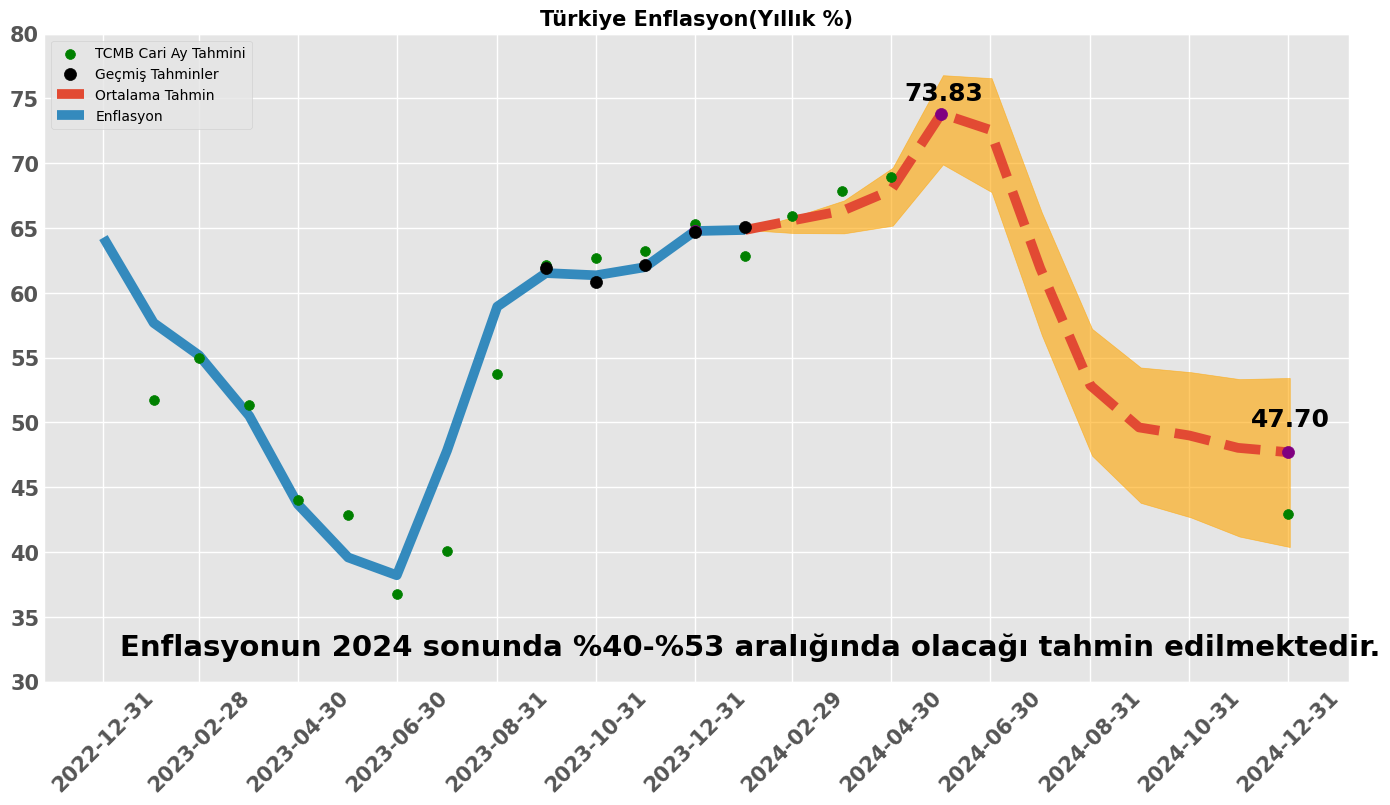

In [759]:
import matplotlib.dates as mdates  # datetime işlevlerini içe aktarın

# ...

plt.style.use('ggplot')
fig=plt.figure(figsize=(15,8))
plt.scatter(x=pd.to_datetime("2024-03-31"),y=ay1sonra["Enflasyon"],color="green",zorder=3,s=50)
plt.scatter(x=pd.to_datetime("2024-04-30"),y=ay2sonra["Enflasyon"],color="green",zorder=3,s=50)
plt.scatter(x=cariay[2:].index,y=cariay["Enflasyon"][2:].values,color="green",zorder=3,label='TCMB Cari Ay Tahmini',s=50)
plt.scatter(x=pd.to_datetime("2024-12-31"),y=ay12sonra["12 Ay Sonrası"].values,color="green",zorder=3,s=50)
plt.scatter(x=yıllıktahmin.index[20:25],y=[61.94,60.84,62.13,64.71,65.06],color='black',zorder=4,label='Geçmiş Tahminler',s=75)
plt.scatter(x=yıllıktahmin.index[23],y=yıllıktahmin.iloc[23,0],color='purple',zorder=3,s=75)
plt.scatter(x=yıllıktahmin.index[28],y=yıllıktahmin.iloc[28,0],color='purple',zorder=3,s=75)
plt.scatter(x=yıllıktahmin.index[35],y=yıllıktahmin.iloc[35,0],color='purple',zorder=3,s=75)
#plt.scatter(x=yıllıktahmin.index[36],y=yıllıktahmin.iloc[36,0],color='orange',zorder=3,s=50)
#plt.scatter(x=yıllıktahmin.index[36],y=yıllıktahmin.iloc[36,0],color='orange',zorder=3,s=50)
plt.plot(yıllıktahmin["Ortalama"].iloc[24:-2],'--',label="Ortalama Tahmin",linewidth=7)
plt.plot(yıllıktahmin["Ortalama"].iloc[11:25],label="Enflasyon",linewidth=7)
plt.fill_between(yıllıktahmin.iloc[24:-1].index.strftime("%Y-%m"), yıllıktahmin["Maksimum"].iloc[24:-1].shift(1), yıllıktahmin["Minimum"].iloc[24:-1].shift(1), alpha=0.6, color='orange')
# Tarihi ekseni birimlerine dönüştürün
annotation_date = mdates.datestr2num('2025-02')
plt.text(mdates.datestr2num('2024-06'), float(tepe)+1, tepe, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-01'), float(sonu2024)+2, sonu2024, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
#plt.text(mdates.datestr2num('2026-01'), float(sonu2024)-5, sonu2025, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
#plt.text(mdates.datestr2num('2025-12'), float(sonra24ay)+3, sonra24ay, fontsize=12, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 32, f"Enflasyonun 2024 sonunda %{min1}-%{max1} aralığında olacağı tahmin edilmektedir.", fontsize=21, color='black', horizontalalignment='right',fontweight='bold')
plt.xticks(yıllıktahmin.index[11:37:2],rotation=45,fontsize=15,fontweight="bold")
plt.yticks(np.arange(30,85,5),fontsize=15,fontweight="bold")
plt.title("Türkiye Enflasyon(Yıllık %)",fontsize=15,fontweight="bold")
plt.legend(loc=2)
plt.savefig('forecast.png')
plt.savefig("./forecasts/"+date.today().strftime("%d-%m-%Y")+'.png')
plt.show()


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2023-09'),
  Text(1, 0, '2023-10'),
  Text(2, 0, '2023-11'),
  Text(3, 0, '2023-12'),
  Text(4, 0, '2024-01')])

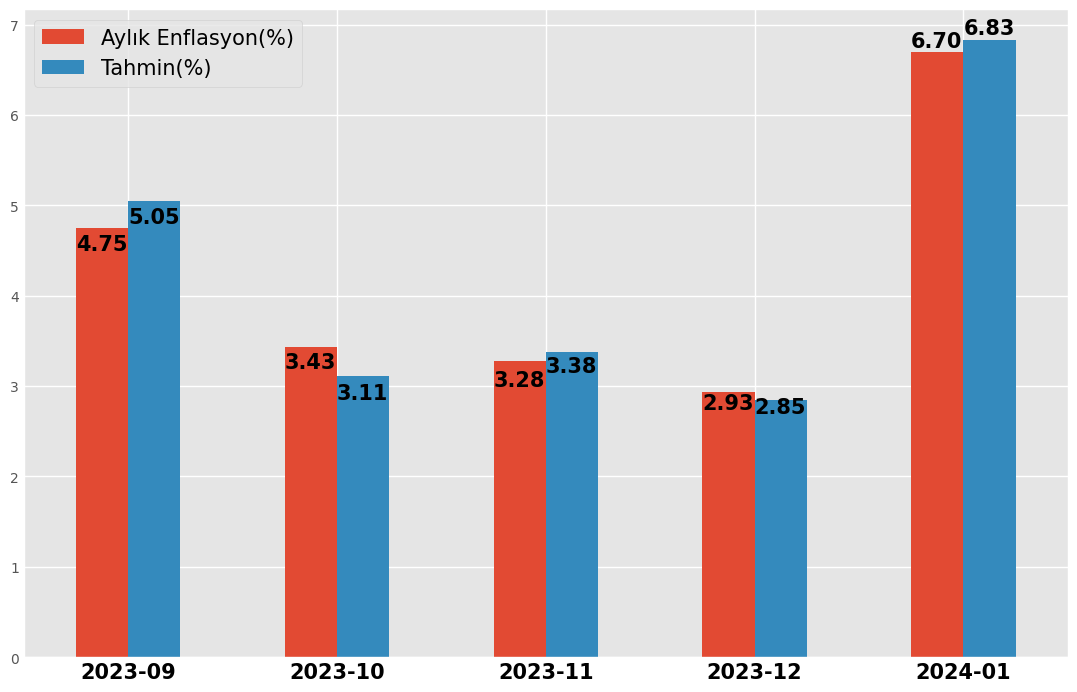

In [760]:
import matplotlib.axes as ax
gecmis=pd.DataFrame({"Aylık Enflasyon(%)":[4.75,3.43,3.28,2.93,6.70],"Tahmin(%)":[5.05,3.11,3.38,2.85,6.83]})
gecmis=gecmis.set_index(pd.date_range(start="2023-09-30",periods=5,freq="M"))
gecmis=gecmis.set_index(gecmis.index.strftime("%Y-%m"))
gecmis.plot(kind="bar",figsize=(12,8))
plt.annotate("4.75",xy=(-0.25,4.5),fontweight="bold",fontsize=15)
plt.annotate("5.05",xy=(0,4.8),fontweight="bold",fontsize=15)
plt.annotate("3.43",xy=(0.75,3.2),fontweight="bold",fontsize=15)
plt.annotate("3.11",xy=(1,2.85),fontweight="bold",fontsize=15)
plt.annotate("3.28",xy=(1.75,3),fontweight="bold",fontsize=15)
plt.annotate("3.38",xy=(2,3.15),fontweight="bold",fontsize=15)
plt.annotate("2.93",xy=(2.75,2.75),fontweight="bold",fontsize=15)
plt.annotate("2.85",xy=(3,2.7),fontweight="bold",fontsize=15)
plt.annotate("6.70",xy=(3.75,6.75),fontweight="bold",fontsize=15)
plt.annotate("6.83",xy=(4,6.90),fontweight="bold",fontsize=15)

plt.legend(fontsize=15)
plt.xticks(rotation=0,fontweight="bold",fontsize=15,color="black")

In [761]:
aralık=aylıktahmin.iloc[0,-1]
aralık = "{:.2f}".format(aralık)
sonu2023=yıllıktahmin.loc["2023-12-31","Ortalama"]
sonu2023="{:.2f}".format(sonu2023)
sonu2024=yıllıktahmin.loc["2024-12-31","Ortalama"]
sonu2024="{:.2f}".format(sonu2024)


Text(10.75, 3.614884372884364, '3.80')

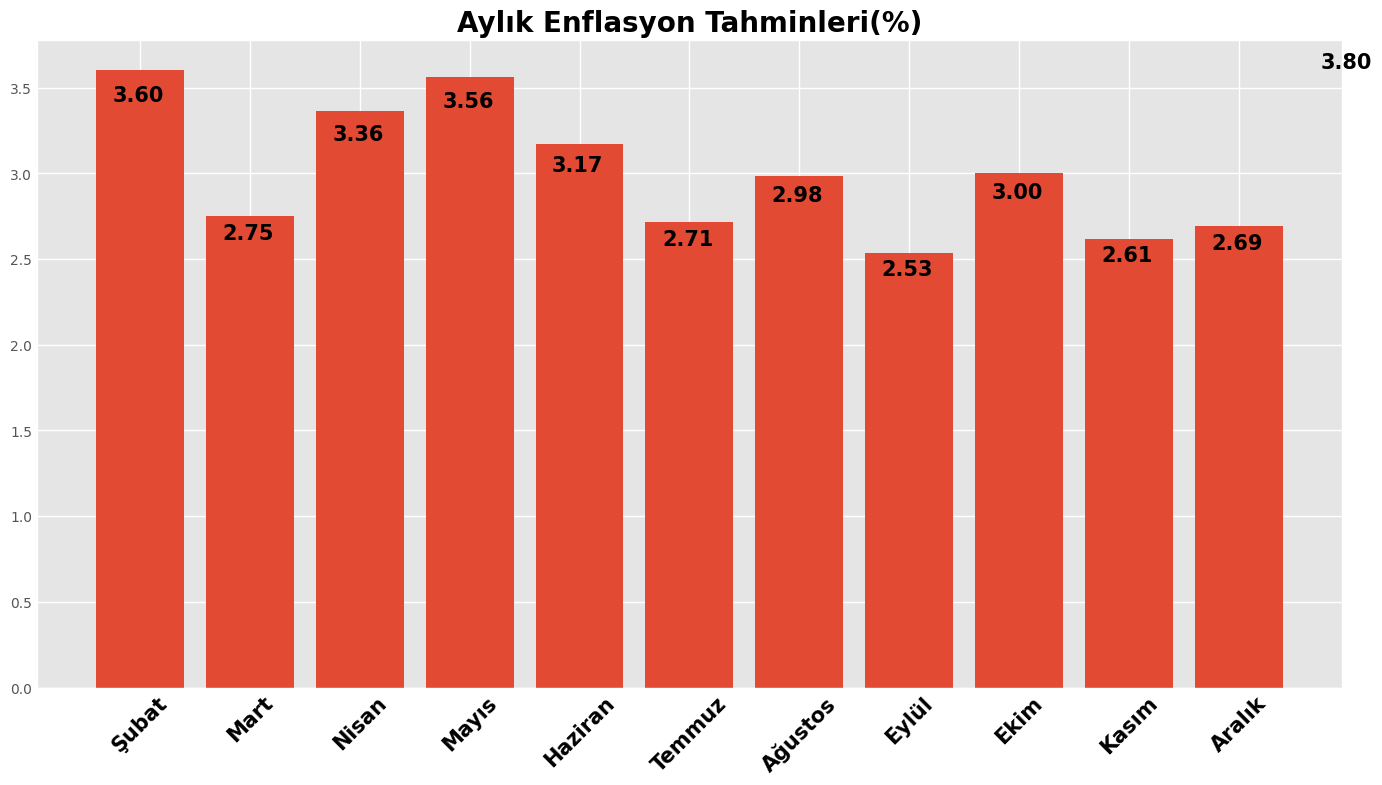

In [762]:
plt.figure(figsize=(15,8))
plt.bar(x=["Şubat","Mart","Nisan","Mayıs","Haziran","Temmuz","Ağustos","Eylül","Ekim","Kasım","Aralık"],height=aylıktahmin.iloc[:-2,-3])
plt.xticks(rotation=45,fontweight="bold",color="black",fontsize=15)
plt.title("Aylık Enflasyon Tahminleri(%)",fontweight="bold",fontsize=20)
plt.annotate(str(aylıktahmin.iloc[0,-3])[:4],xy=(-0.25,aylıktahmin.iloc[0,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[1,-3])[:4],xy=(0.75,aylıktahmin.iloc[1,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[2,-3])[:4],xy=(1.75,aylıktahmin.iloc[2,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[3,-3])[:4],xy=(2.75,aylıktahmin.iloc[3,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[4,-3])[:4],xy=(3.75,aylıktahmin.iloc[4,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[5,-3])[:4],xy=(4.75,aylıktahmin.iloc[5,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[6,-3])[:4],xy=(5.75,aylıktahmin.iloc[6,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[7,-3])[:4],xy=(6.75,aylıktahmin.iloc[7,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[8,-3])[:4],xy=(7.75,aylıktahmin.iloc[8,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[9,-3])[:4],xy=(8.75,aylıktahmin.iloc[9,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[10,-3])[:4],xy=(9.75,aylıktahmin.iloc[10,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[11,-3])[:4],xy=(10.75,aylıktahmin.iloc[11,-3]*0.95),fontweight="bold",fontsize=15)